<h1><center>BootCamp - Grupo 25</center></h1>




# Problema: Como a pandemia influenciou e continuará influenciando a saúde mental das pessoas?

### Importando dados

In [1]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importando os dados
df = pd.read_csv('/content/drive/MyDrive/BootCampElo_datasets/caso_full.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2488960 entries, 0 to 2488959
Data columns (total 18 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   city                                           object 
 1   city_ibge_code                                 float64
 2   date                                           object 
 3   epidemiological_week                           int64  
 4   estimated_population                           float64
 5   estimated_population_2019                      float64
 6   is_last                                        bool   
 7   is_repeated                                    bool   
 8   last_available_confirmed                       int64  
 9   last_available_confirmed_per_100k_inhabitants  float64
 10  last_available_date                            object 
 11  last_available_death_rate                      float64
 12  last_available_deaths                     

In [5]:
df.head(5)

city  city_ibge_code        date  ...  state  new_confirmed  new_deaths
0  Rio Branco       1200401.0  2020-03-17  ...     AC              3           0
1         NaN            12.0  2020-03-17  ...     AC              3           0
2  Rio Branco       1200401.0  2020-03-18  ...     AC              0           0
3         NaN            12.0  2020-03-18  ...     AC              0           0
4  Rio Branco       1200401.0  2020-03-19  ...     AC              1           0

[5 rows x 18 columns]

In [6]:
print('O Dataset possui {} colunas e {} entradas'.format(len(df.columns), len(df)))

O Dataset possui 18 colunas e 2488960 entradas


### Atualizando formatos

In [7]:
# transformar campo de data em tipo datetime
df['date']=pd.to_datetime(df['date'])
# excluir as linhas repetidas
df = df.drop(df[df['is_repeated']== True].index)

In [8]:
# Verificando a soma da quantidade de valores nulos por coluna
df.isnull().sum()

city                                             13433
city_ibge_code                                    8392
date                                                 0
epidemiological_week                                 0
estimated_population                              8392
estimated_population_2019                         8392
is_last                                              0
is_repeated                                          0
last_available_confirmed                             0
last_available_confirmed_per_100k_inhabitants    22482
last_available_date                                  0
last_available_death_rate                            0
last_available_deaths                                0
order_for_place                                      0
place_type                                           0
state                                                0
new_confirmed                                        0
new_deaths                                           0
dtype: int

### Verificando a integridade dos dados:

*   Verificando se as 27 unidades federativas estão presentes no dataset
*   Verificando se os dias do mês estão completos: 1 a 31
*   Verificando se os meses completos: 1 a 12



In [9]:
# Verificando quais os estados estão representados
df['state'].unique()

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [10]:
# Verificando a consistência dos dias dos meses representados
pd.DatetimeIndex(df['date']).day.unique().sort_values()

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='date')

In [11]:
# Verificando a consistência dos meses representados
pd.DatetimeIndex(df['date']).month.unique().sort_values()

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='date')

In [12]:
# Verificando os tipos de lugares na variável place_type
df['place_type'].unique()

array(['city', 'state'], dtype=object)

1. Análise sobre estados, dias e meses:

- Todos os estados estão representados, assim como todos os dias e meses possíveis;
- Os tipos de lugares possíveis são cidade ou estado.

### Entendendo os dados sem código de cidade

In [13]:
# Buscando 5 exemplos de dados nulos da coluna city_ibge_code
df[df.city_ibge_code.isnull()].sample(5)

city  city_ibge_code  ... new_confirmed  new_deaths
1599123  Importados/Indefinidos             NaN  ...            10           0
1601530  Importados/Indefinidos             NaN  ...             0           0
247233   Importados/Indefinidos             NaN  ...          -665           2
712145   Importados/Indefinidos             NaN  ...          2824          82
367397   Importados/Indefinidos             NaN  ...           153           0

[5 rows x 18 columns]

In [14]:
# Verificando o tipo de lugar (cidade ou estado) quando o city_ibge_code é nulo
df[df.city_ibge_code.isnull()].place_type.unique()

array(['city'], dtype=object)

In [15]:
# Buscando a quantidade de valores nulos sumultâneos para as colunas city_ibge_code, estimated_population e estimated_population_2019
len(df[(df.city_ibge_code.isnull()) & (df.estimated_population.isnull()) & (df.estimated_population_2019.isnull())])

8392

2. Análise sobre código ibge:

- Para todo 'city_ibge_code' nulo, o tipo de lugar é cidade;
- Sempre que 'city_ibge_code' é nulo, os dados estimated_population e estimated_population_2019 também são nulos, que são 8392 valores;
- Esse valor de 8392 valores nulos simultâneos entre essas colunas é o mesmo da quantidade de nulos totais dessas colunas, ou seja, sempre que uma coluna é nula, as outras duas também são nulas.


### Identificando os valores 'is_last'

In [16]:
print('Os valores diferentes para coluna is_last são:', df['is_last'].unique())
print('Quantidade de valores False:', (df['is_last'] == False).sum())
print('Quantidade de valores True:', (df['is_last'] == True).sum())

Os valores diferentes para coluna is_last são: [False  True]
Quantidade de valores False: 2296007
Quantidade de valores True: 5616


In [17]:
# Valores em que o is_last é True
df[df['is_last'] == True].head()

city  city_ibge_code       date  ...  state  new_confirmed  new_deaths
10492    Acrelândia       1200013.0 2021-07-25  ...     AC              0           0
10493  Assis Brasil       1200054.0 2021-07-25  ...     AC              0           0
10494     Brasiléia       1200104.0 2021-07-25  ...     AC              2           0
10495        Bujari       1200138.0 2021-07-25  ...     AC              0           0
10496      Capixaba       1200179.0 2021-07-25  ...     AC              0           0

[5 rows x 18 columns]

In [18]:
# Verificar em quais semanas epdemiológicas estão espalhados os dados mais atualizados
df[df['is_last'] == True].epidemiological_week.unique()

array([202130, 202126, 202129, 202124])

In [19]:
# Verificar em quais datas estão espalhados os dados mais atualizados
sorted(df[df['is_last'] == True].date.unique())

[numpy.datetime64('2021-06-18T00:00:00.000000000'),
 numpy.datetime64('2021-07-02T00:00:00.000000000'),
 numpy.datetime64('2021-07-20T00:00:00.000000000'),
 numpy.datetime64('2021-07-21T00:00:00.000000000'),
 numpy.datetime64('2021-07-22T00:00:00.000000000'),
 numpy.datetime64('2021-07-23T00:00:00.000000000'),
 numpy.datetime64('2021-07-24T00:00:00.000000000'),
 numpy.datetime64('2021-07-25T00:00:00.000000000'),
 numpy.datetime64('2021-07-26T00:00:00.000000000'),
 numpy.datetime64('2021-07-27T00:00:00.000000000')]

3. Análise sobre os dados 'is_last':

- É possível concluir que a coluna 'is_last' se refere aos dados mais atualizados;

- Os dados mais atualizados podem ser diferente para cada cidade.

Dessa forma, agora é necessário entender quais dados estão com as informações mais "atrasadas".

In [20]:
# Estados apresentados como dados mais atualizados em cada dia em que o is_last é True para dados das cidades
for i in (sorted(df[df['is_last'] == True].date.unique())):
  print(' Data: ', i, '  ', df[(df['is_last'] == True) & (df['date'] == i) & (df['place_type'] == 'city')].state.unique())

 Data:  2021-06-18T00:00:00.000000000    ['MG']
 Data:  2021-07-02T00:00:00.000000000    ['AL']
 Data:  2021-07-20T00:00:00.000000000    ['TO']
 Data:  2021-07-21T00:00:00.000000000    ['RN']
 Data:  2021-07-22T00:00:00.000000000    ['BA' 'CE' 'MA' 'MS' 'PB']
 Data:  2021-07-23T00:00:00.000000000    ['SE']
 Data:  2021-07-24T00:00:00.000000000    ['PA' 'RO']
 Data:  2021-07-25T00:00:00.000000000    ['AC' 'RS' 'SP']
 Data:  2021-07-26T00:00:00.000000000    ['AM' 'AP' 'DF' 'ES' 'GO' 'MT' 'PE' 'PI' 'PR' 'RJ' 'RR' 'SC']
 Data:  2021-07-27T00:00:00.000000000    []


4. Análise sobre dados "atrasados" de cidades:

- É possível observar que as ultimas atualizações de dados por cidade do estado de MG foram atualizados somente em 18/06/2021. Da mesma forma, para as cidade de AL as ultimas atualizações foram de 02/07/2021 e assim por diante;

- Os dados por cidade são atualizados de forma desigual, dificultando a análise mais recente a nível de cidade.

Agora é necessária a análise a nível de estados

In [21]:
# Estados apresentados como dados mais atualizados em cada dia em que o is_last é True para dados dos estados
for i in (sorted(df[df['is_last'] == True].date.unique())):
  print(' Data: ', i, '  ', df[(df['is_last'] == True) & (df['date'] == i) & (df['place_type'] == 'state')].state.unique())

 Data:  2021-06-18T00:00:00.000000000    []
 Data:  2021-07-02T00:00:00.000000000    []
 Data:  2021-07-20T00:00:00.000000000    []
 Data:  2021-07-21T00:00:00.000000000    []
 Data:  2021-07-22T00:00:00.000000000    []
 Data:  2021-07-23T00:00:00.000000000    []
 Data:  2021-07-24T00:00:00.000000000    []
 Data:  2021-07-25T00:00:00.000000000    []
 Data:  2021-07-26T00:00:00.000000000    ['MS' 'RN' 'RR' 'TO']
 Data:  2021-07-27T00:00:00.000000000    ['AC' 'AL' 'AM' 'AP' 'BA' 'CE' 'DF' 'ES' 'GO' 'MA' 'MG' 'MT' 'PA' 'PB'
 'PE' 'PI' 'PR' 'RJ' 'RO' 'RS' 'SC' 'SE' 'SP']


5. Análise sobre dados "atrasados" de estados:

- Já para os dados gerais dos estados, sem separação entre as cidades, os valores estão mais atualizados, de forma que a maioria dos estados possuem dados até o dia 27/07/2021 e apenas os estados 'MS' 'RN' 'RR' 'TO' apresentam os dados mais atualizados um dia antes, 26/07/2021.


- Em concordância com a outra base de dados, que possui apenas dados sobre os estados, essa base dados será separada de forma a ter essas informações sobre covid a nível estadual. 

### Separação da base de dados a nível de estado e cidade

In [22]:
# Separando a base de dados de informações dos estados
dfEstados = df[df['place_type'] == 'state']

In [23]:
dfEstados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13433 entries, 1 to 2488819
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   city                                           0 non-null      object        
 1   city_ibge_code                                 13433 non-null  float64       
 2   date                                           13433 non-null  datetime64[ns]
 3   epidemiological_week                           13433 non-null  int64         
 4   estimated_population                           13433 non-null  float64       
 5   estimated_population_2019                      13433 non-null  float64       
 6   is_last                                        13433 non-null  bool          
 7   is_repeated                                    13433 non-null  bool          
 8   last_available_confirmed                       13433 n

In [24]:
# excluindo as colunas do nome da cidade e código da cidade 
dfEstados.drop(columns=['city', 'city_ibge_code'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
# Separando a base de dados de cidades
dfCidades = df[df['place_type'] == 'city']

In [26]:
# Separando os dados de cidades que são Importados/Indefinidos
dfCidadesIndefinido =  dfCidades[dfCidades['city']=='Importados/Indefinidos']

Os dados foram separados, de forma que o dfEstados será utilizado a partir de agora para as próximas análises e visualizações.

# Visualização

In [27]:
sns.set_style("whitegrid")

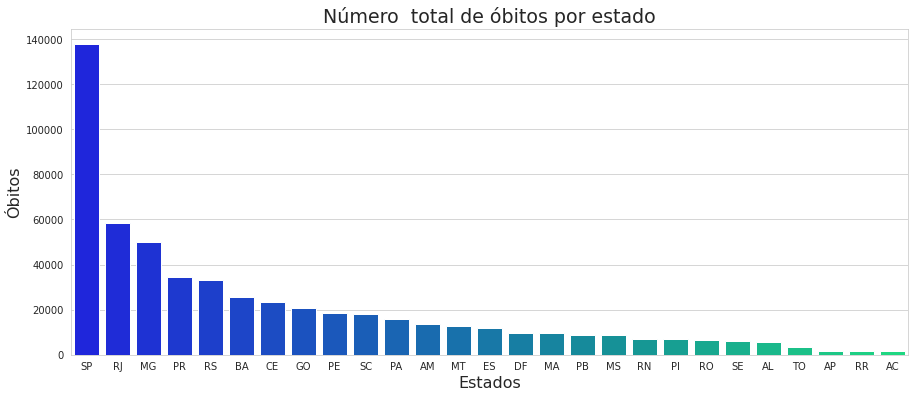

In [28]:
# Mostrar total de mortes por estado
fig_dims = (15, 6)
fig, axx = plt.subplots(figsize=fig_dims)

ax = sns.barplot(x = dfEstados.groupby(dfEstados['state'])["last_available_deaths"].max().sort_values(ascending=False).index, 
                 y = dfEstados.groupby(dfEstados['state'])["last_available_deaths"].max().sort_values(ascending=False), 
                 data=dfEstados, ax=axx, palette="winter")
ax.set_ylabel("Óbitos", fontsize = 16)
ax.set_xlabel("Estados", fontsize = 16)
ax.set_title("Número  total de óbitos por estado", fontsize = 19)
plt.show()

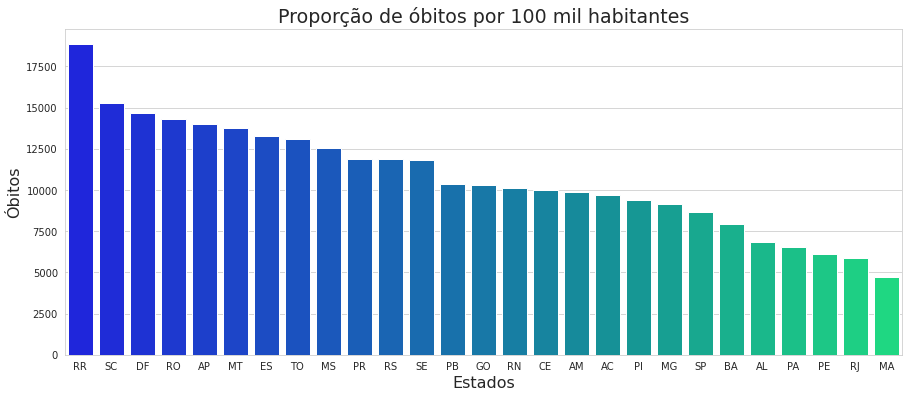

In [29]:
# Mostrar total de mortes a cada 100 mil habitantes por estado
fig_dims = (15, 6)
fig, axx = plt.subplots(figsize=fig_dims)

ax = sns.barplot(x = dfEstados.groupby(dfEstados['state'])["last_available_confirmed_per_100k_inhabitants"].max().sort_values(ascending=False).index, 
                 y = dfEstados.groupby(dfEstados['state'])["last_available_confirmed_per_100k_inhabitants"].max().sort_values(ascending=False), 
                 data=dfEstados, ax=axx, palette="winter")
ax.set_ylabel("Óbitos", fontsize = 16)
ax.set_xlabel("Estados", fontsize = 16)
ax.set_title("Proporção de óbitos por 100 mil habitantes", fontsize = 19)
plt.show()

A partir desses dois gráficos é possível observar que o estado de São Paulo (SP) é o estado com o maior número absoluto de mortes por covid. 
O segundo estado com mais mortes, que é o Rio de Janeiro, tem menos da metade das mortes que o estado de São Paulo. Apesar disso, o estado de SP é apenas o 21° estado com mais mortes a cada 100 mil habitantes.

O dado de mortes a cada 100 mil habitantes corresponde melhor sobre como cada estado respondeu à pandemia. É possível observar que Roraima, que é o segundo estado com menos mortes absolutas por covid, é o estado com mais mortes a cada 100 mil habitantes. 

Dessa forma, apesar de SP ter o maior número de óbitos por covid com mais que o dobro que o segundo estado com mais mortes, é o estado de Roraima que teve mais mortes proporcionais ao tamanho de sua população. 

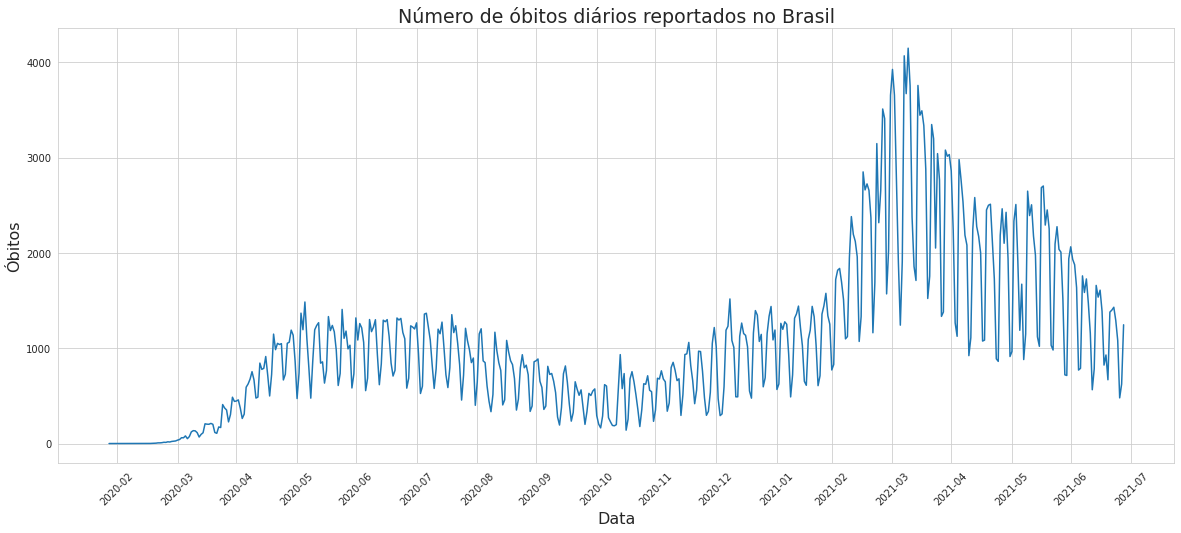

In [30]:
# Mostrar gráfico com número de mortes diárias do Brasil
fig_dims = (20, 8)
fig, axx = plt.subplots(figsize=fig_dims)

ax = sns.lineplot(x = dfEstados.groupby(dfEstados['date'])["new_deaths"].sum().index, 
                 y = dfEstados.groupby(dfEstados['date'])["new_deaths"].sum(), 
                ax=axx, ci = 200)
ax.set_ylabel("Óbitos", fontsize = 16)
ax.set_xlabel("Data", fontsize = 16)
ax.set_title("Número de óbitos diários reportados no Brasil", fontsize = 19)
ax.set_xticks(pd.date_range(start="2020-02",end="2021-08", freq='M'))
ax.set_xticklabels(pd.date_range(start="2020-02",end="2021-08", freq='M', closed=None).strftime('%Y-%m'),rotation = 45)
plt.show()

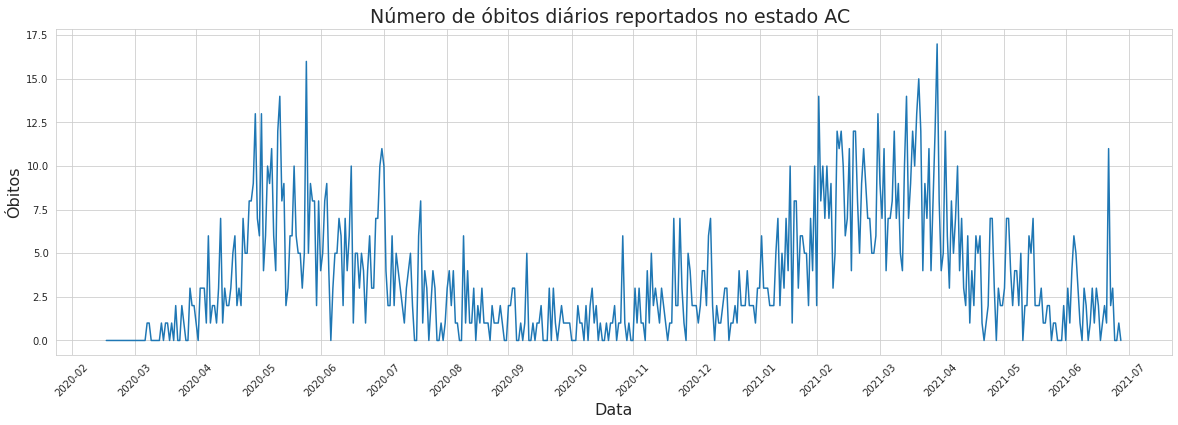

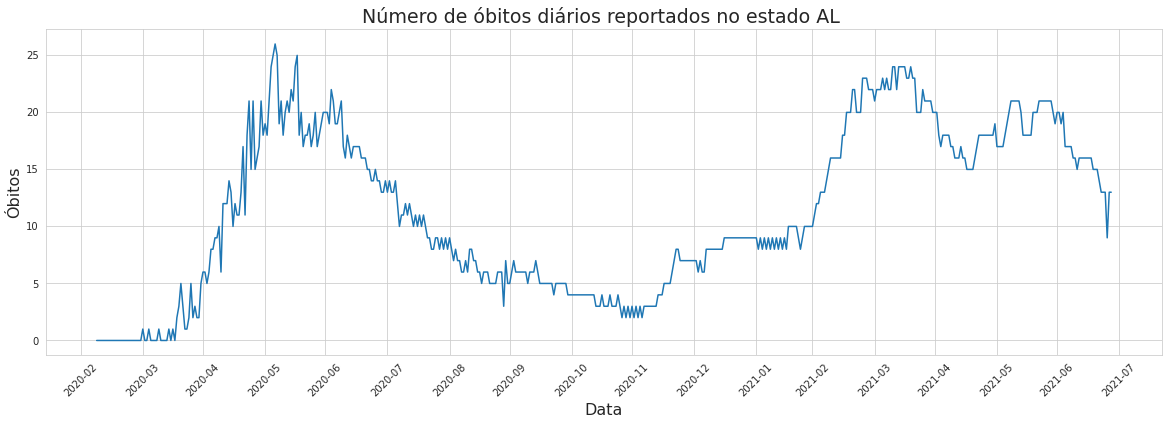

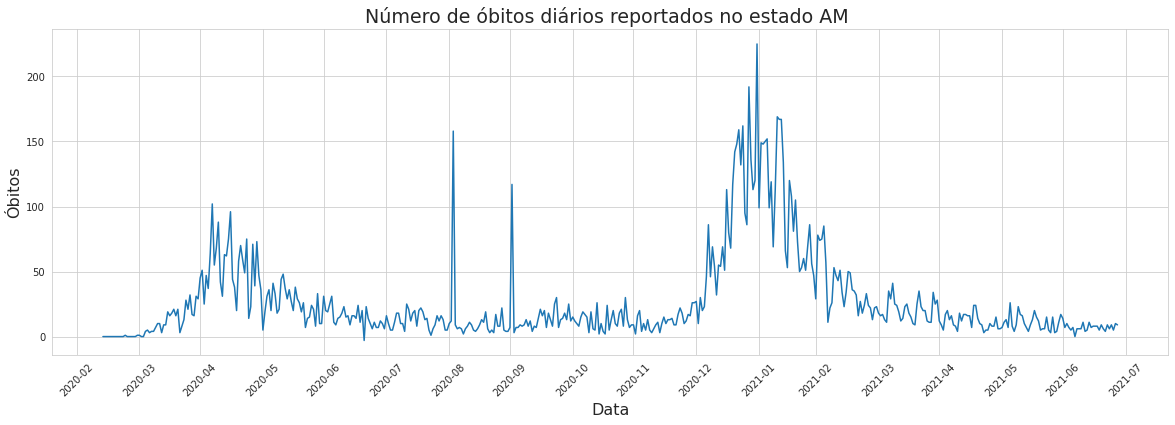

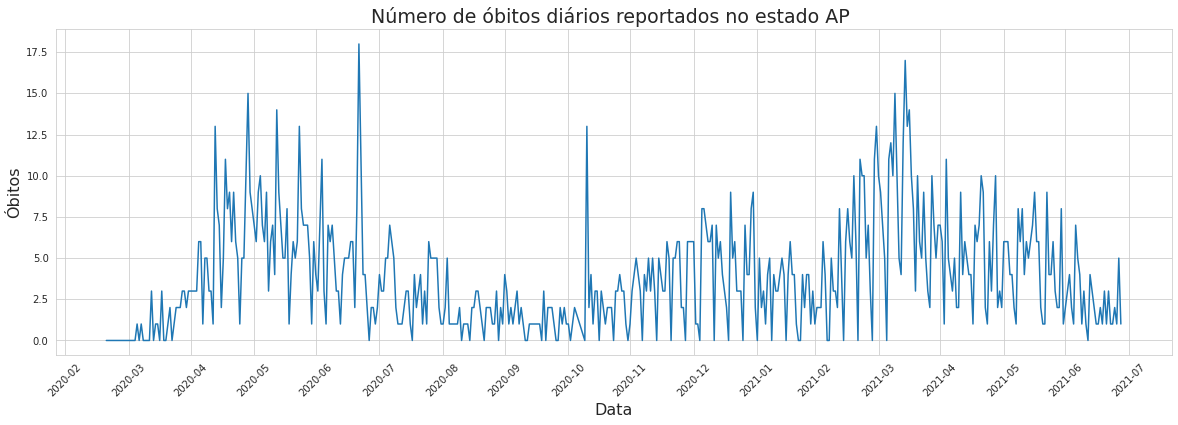

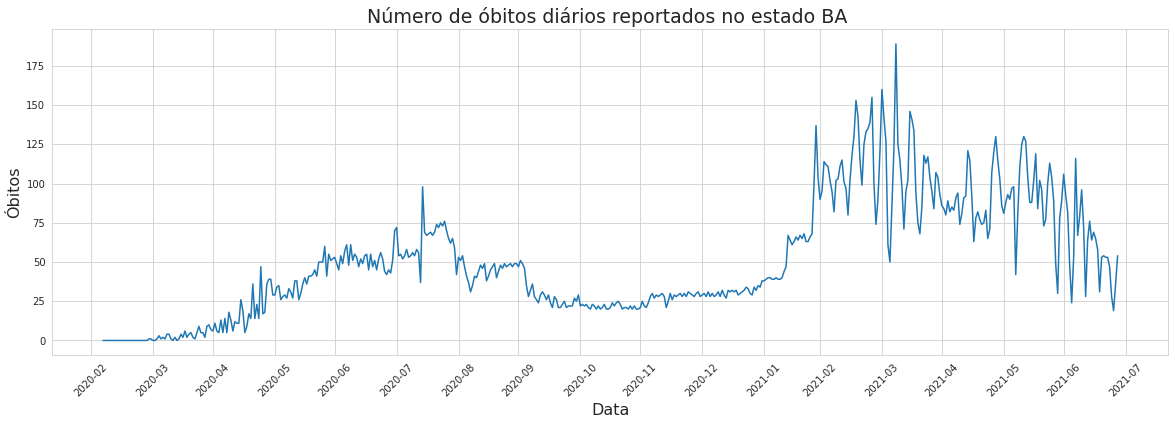

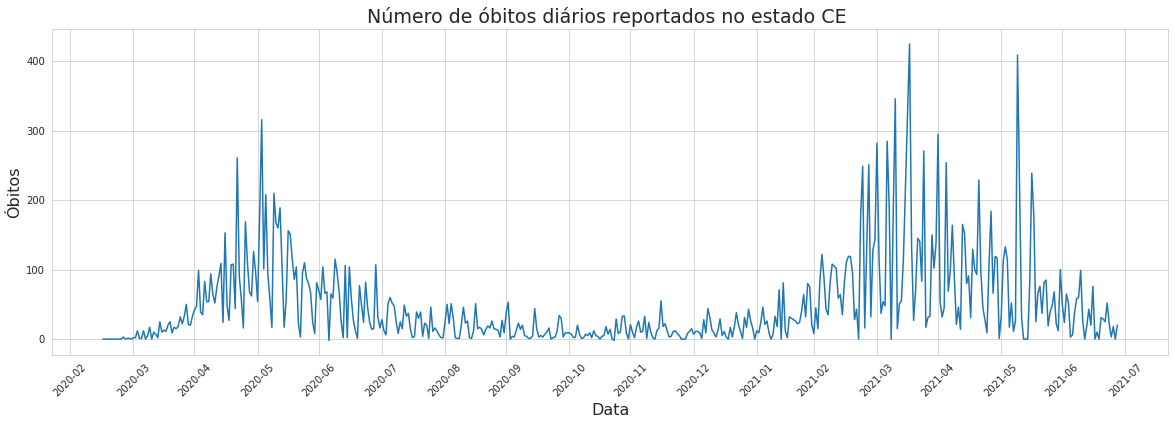

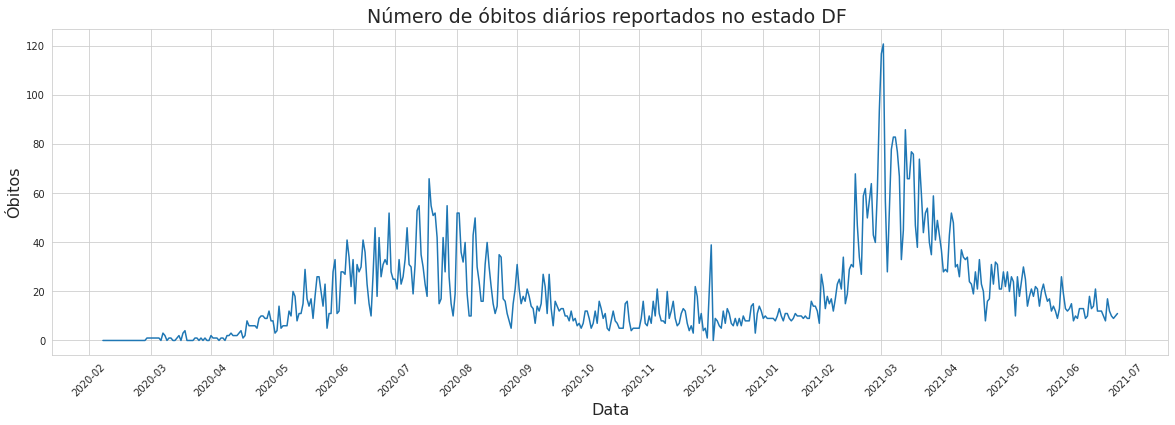

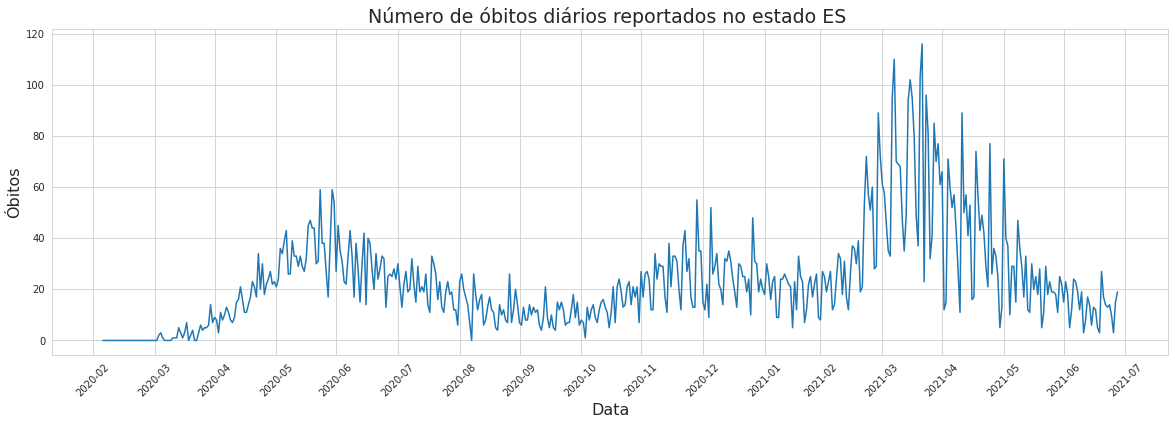

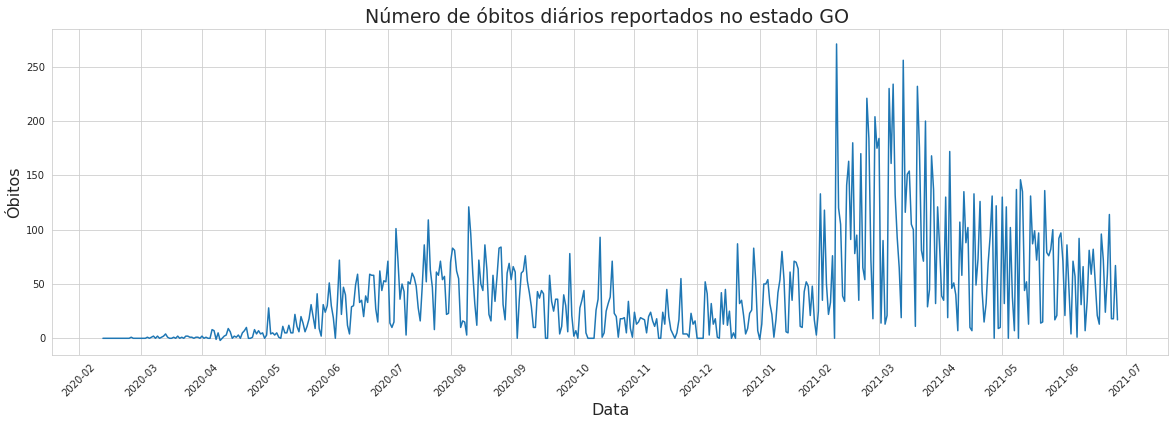

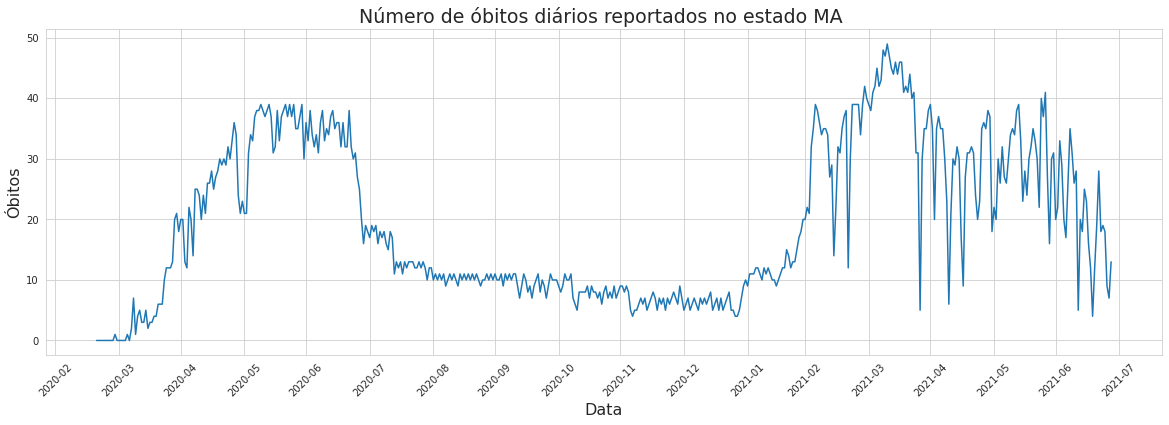

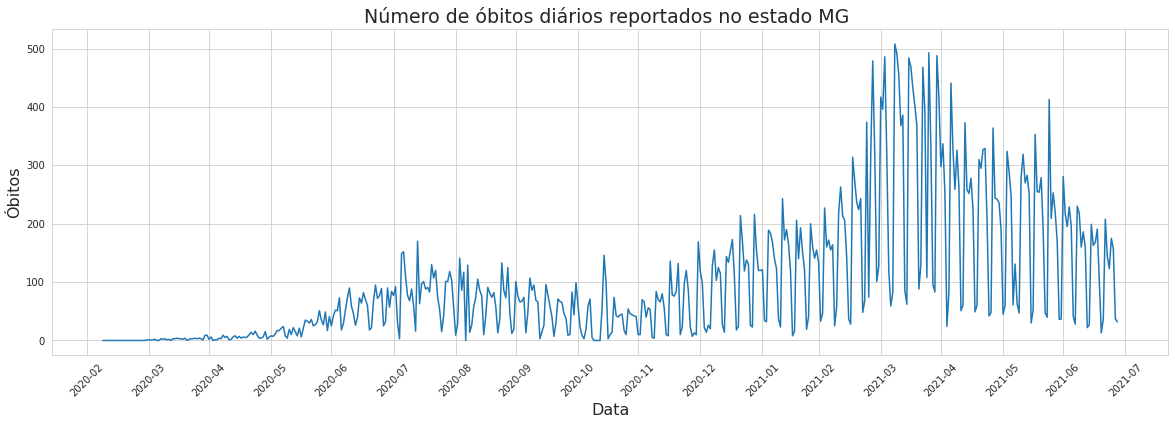

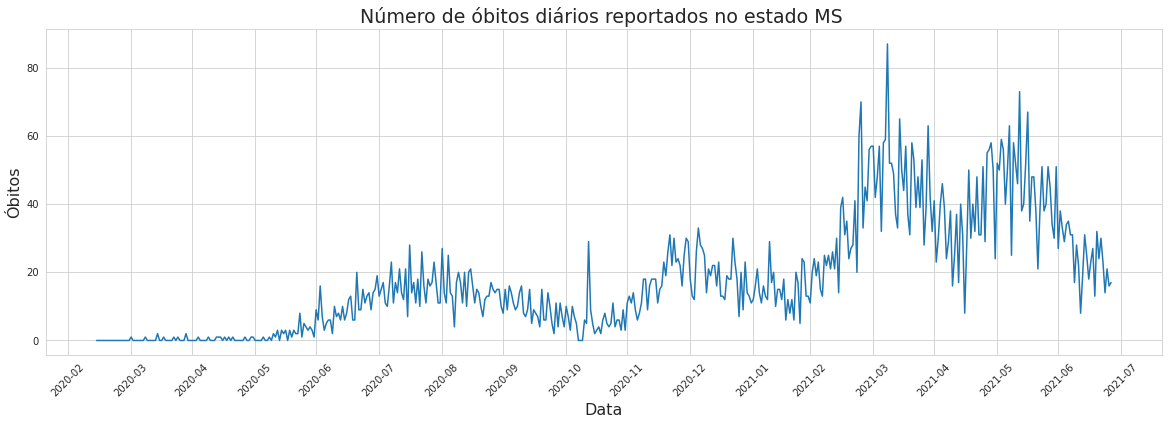

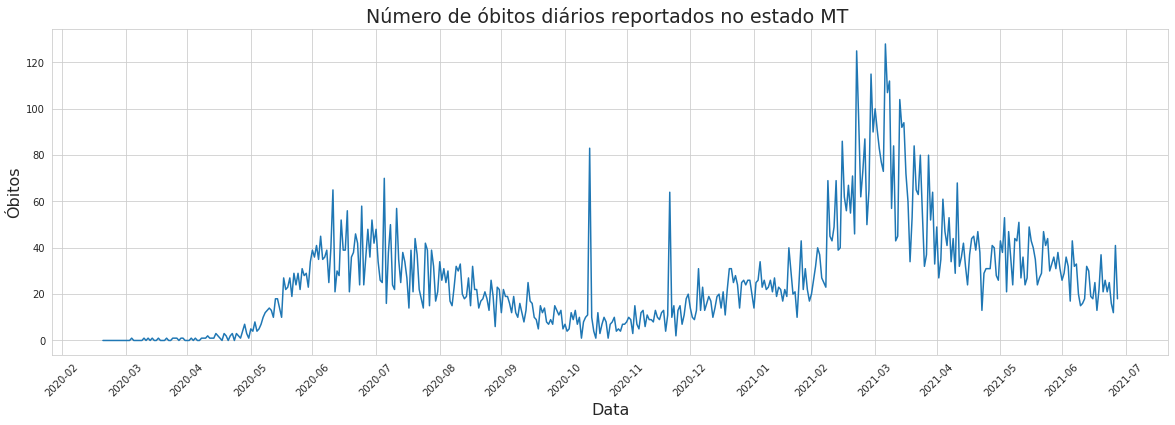

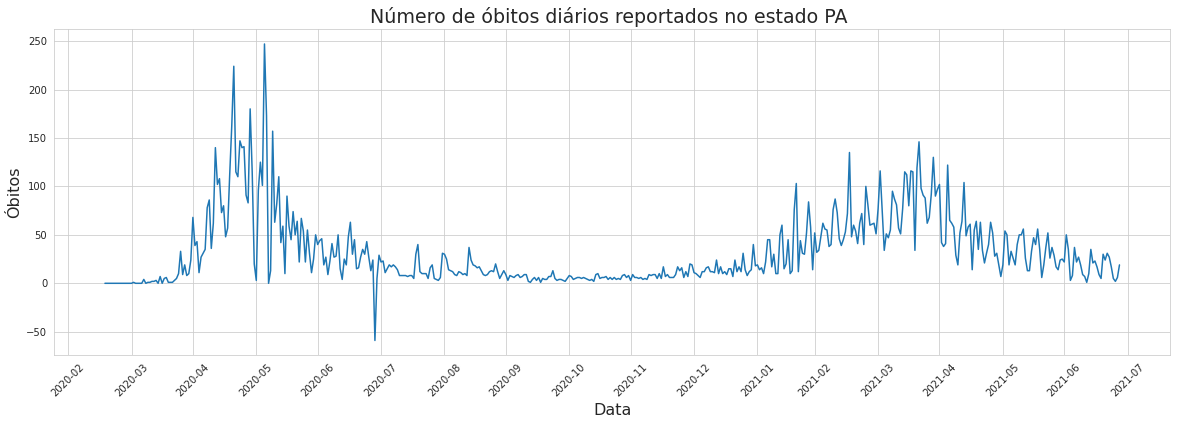

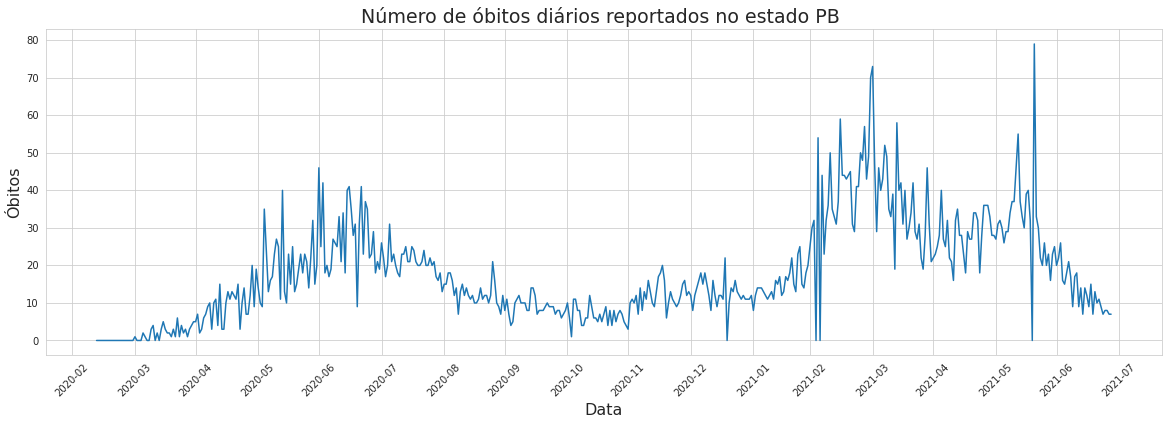

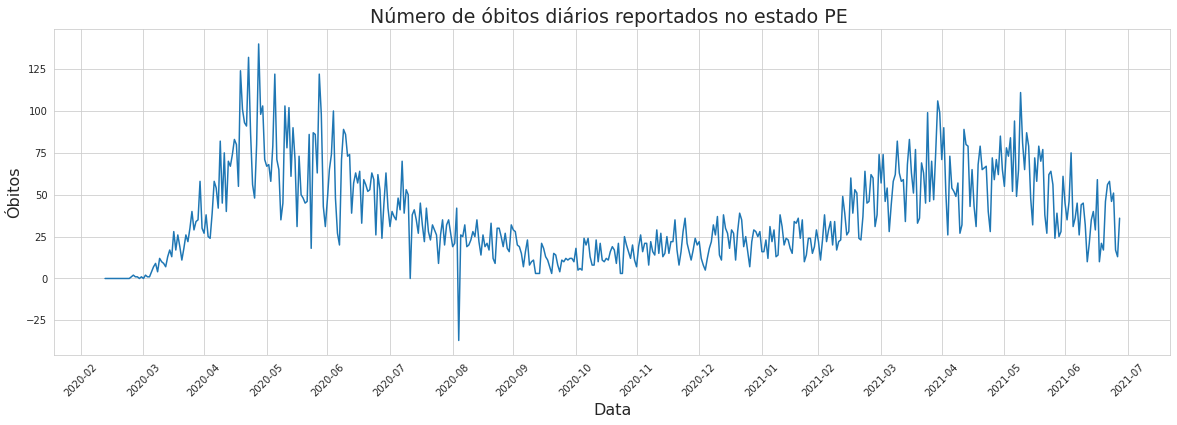

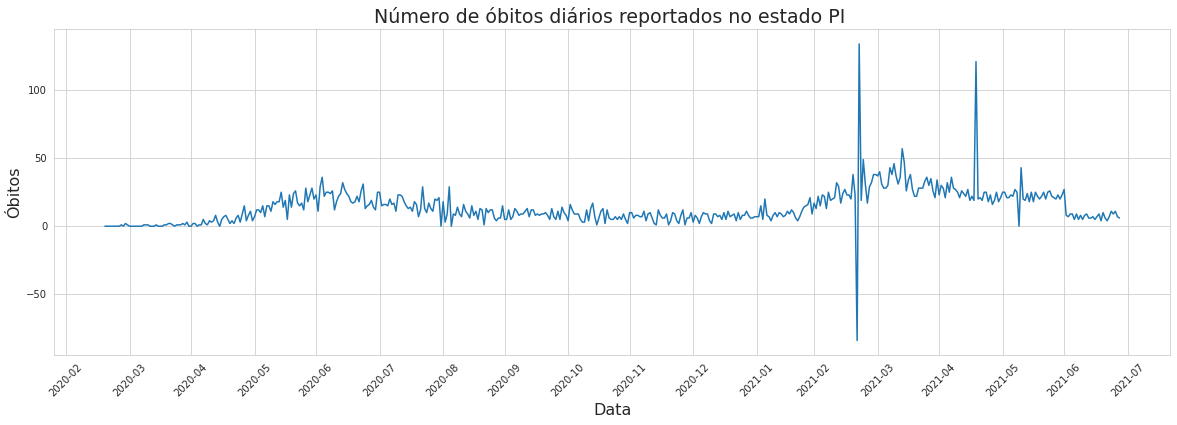

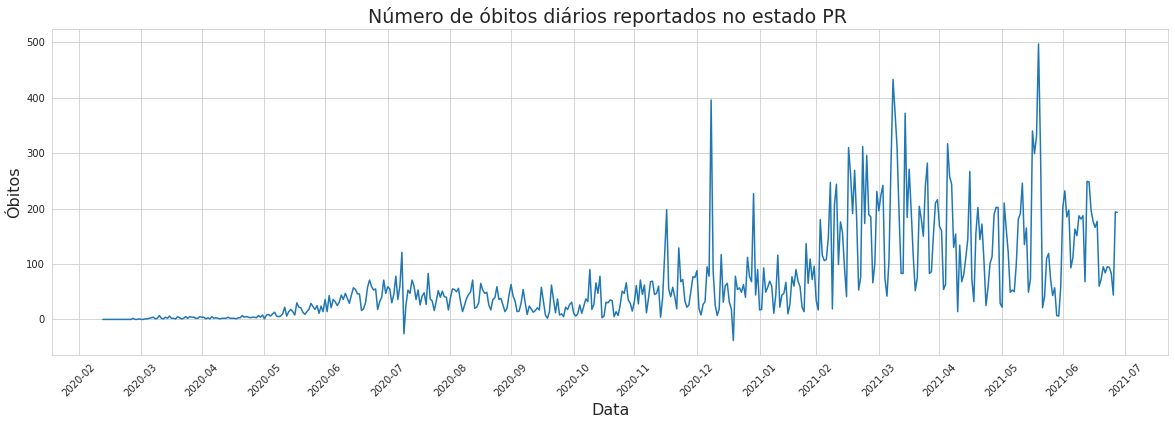

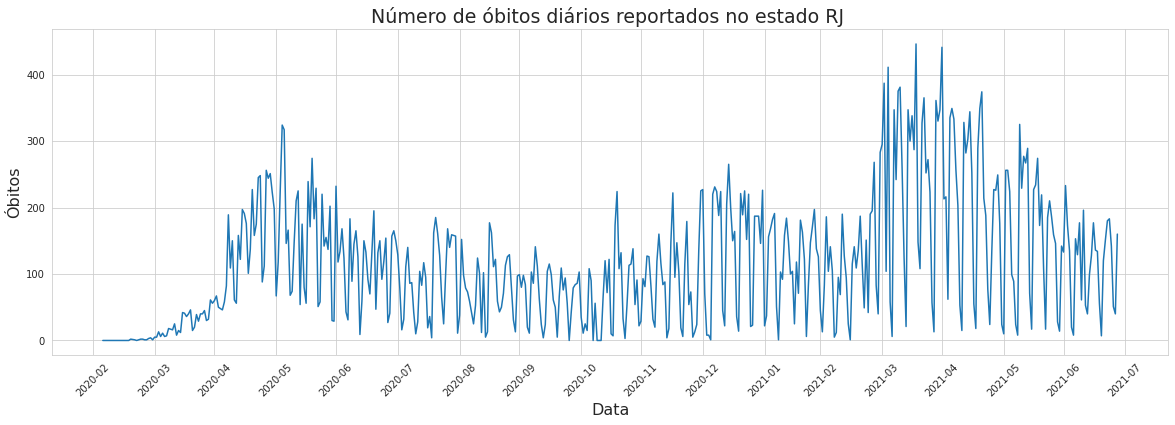

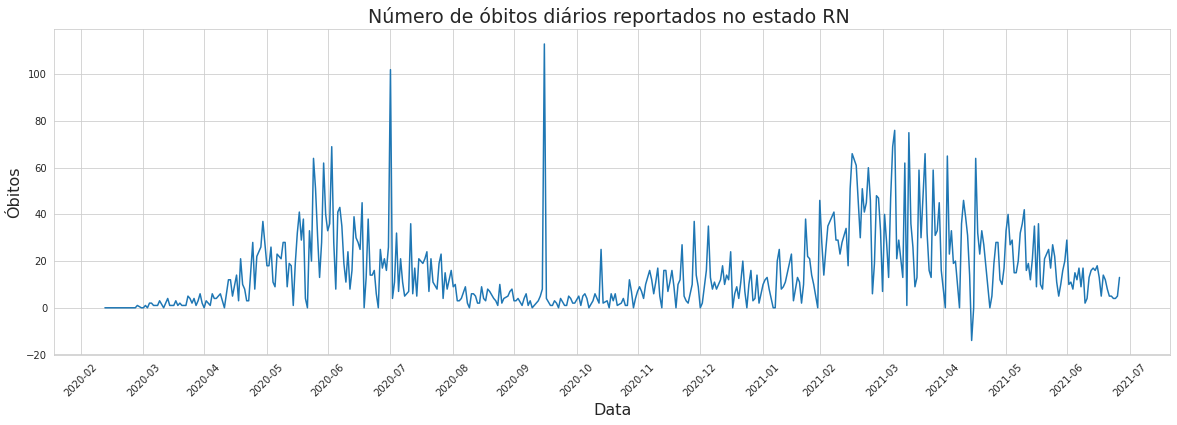

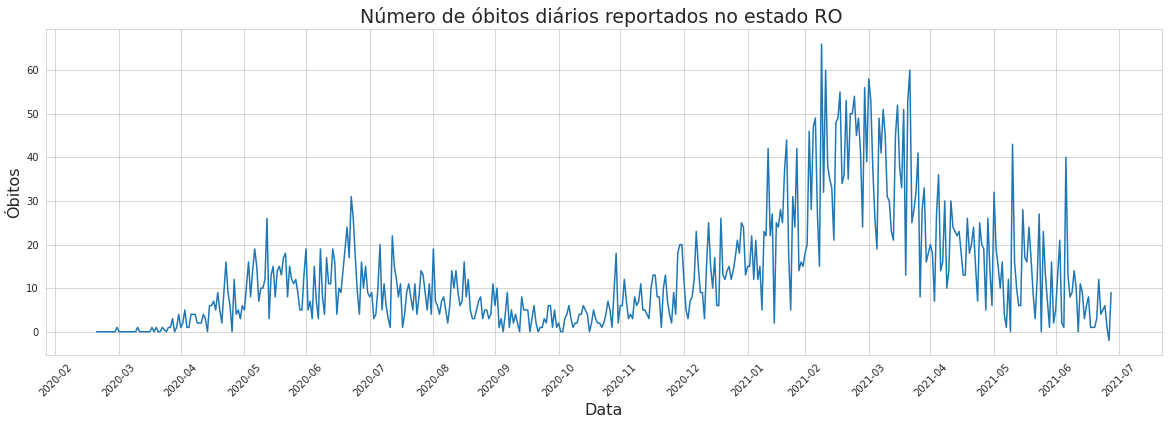

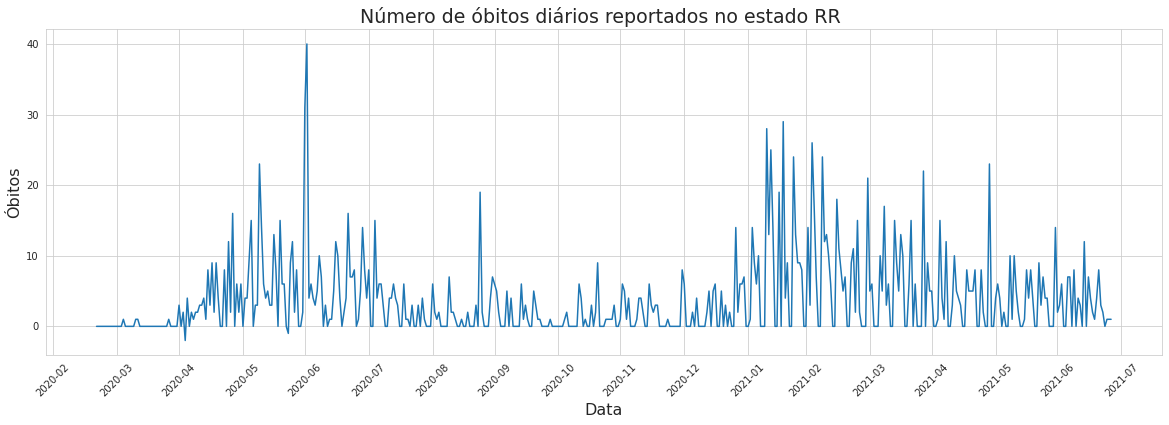

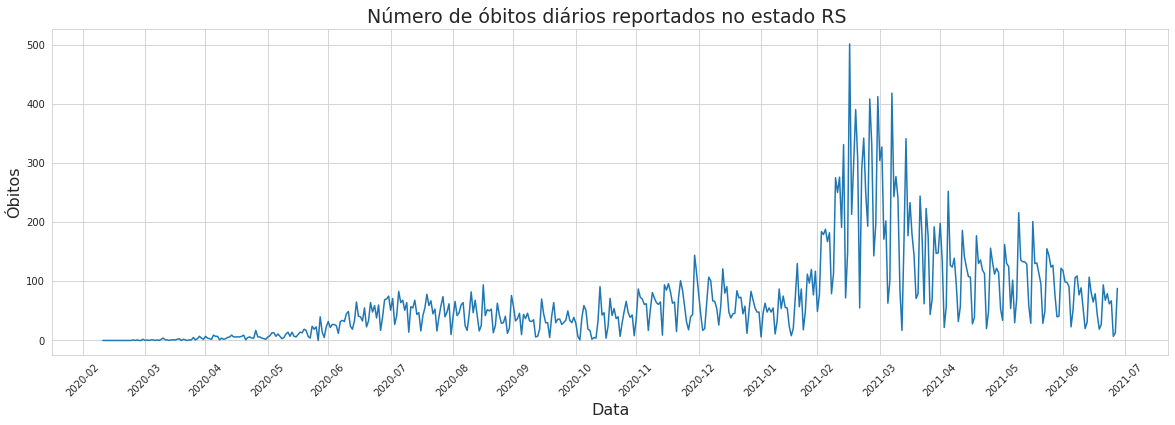

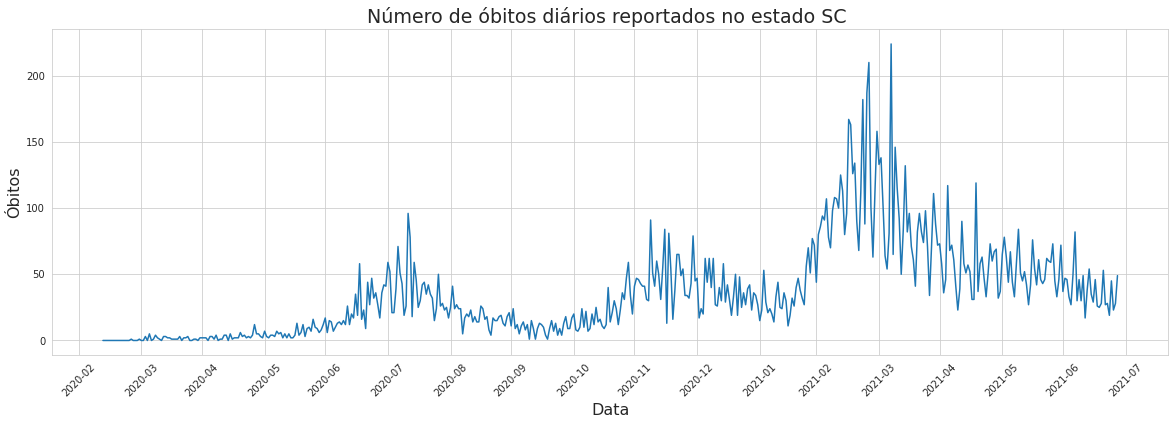

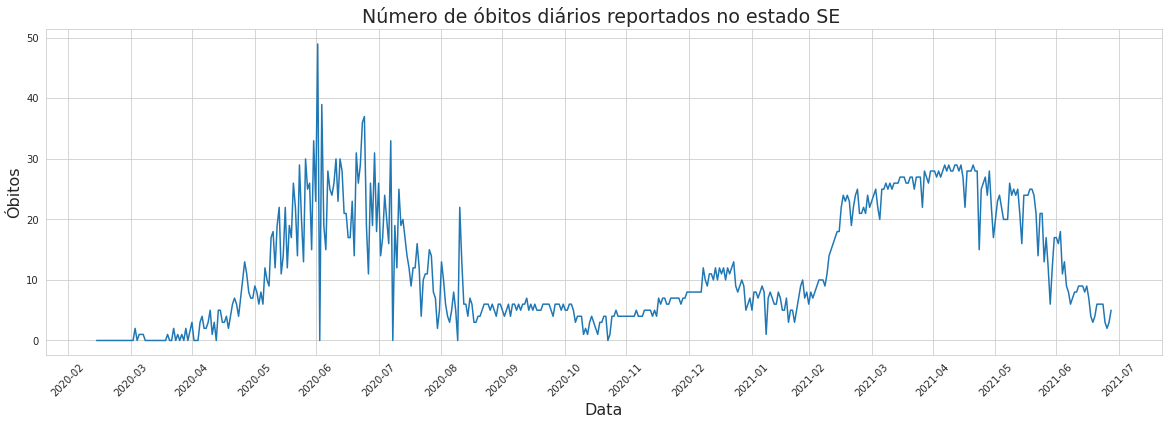

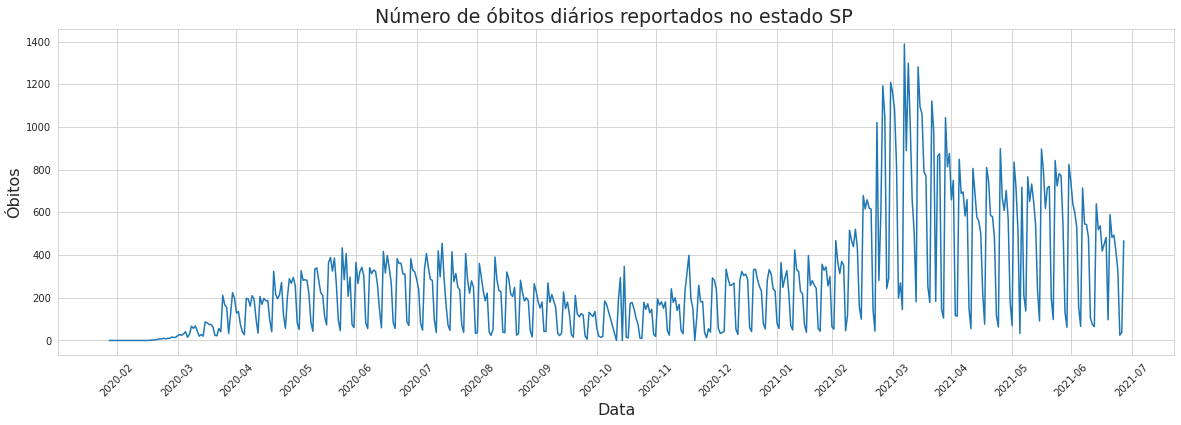

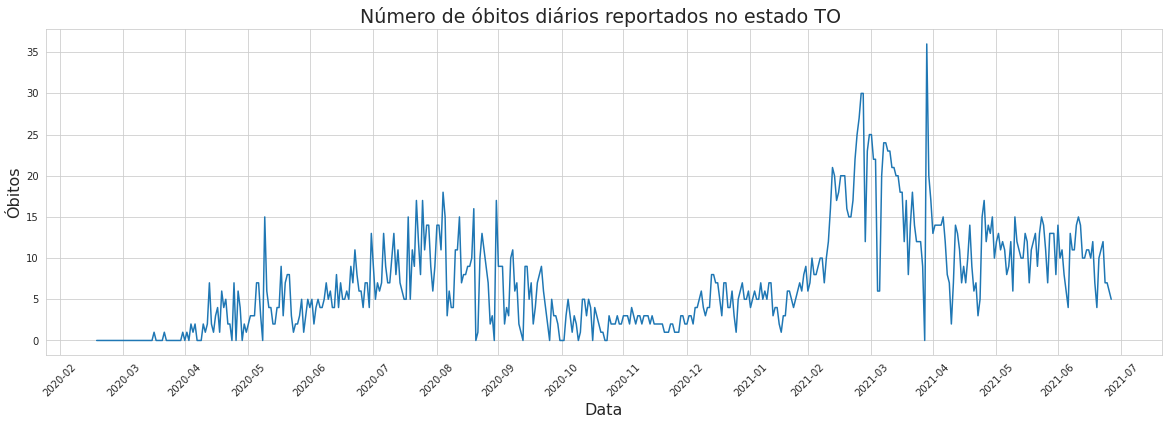

In [31]:
# Mostrar gráfico com número de mortes diárias de cada estado
for i in (dfEstados['state'].unique()):
  
  fig_dims = (20, 6)
  fig, axx = plt.subplots(figsize=fig_dims)

  ax = sns.lineplot(x = dfEstados[(dfEstados['state'] == i)]['date'], 
                    y = dfEstados[dfEstados['state'] == i]["new_deaths"], 
                    ax=axx, ci = 200)
  ax.set_ylabel("Óbitos", fontsize = 16)
  ax.set_xlabel("Data", fontsize = 16)
  ax.set_title("Número de óbitos diários reportados no estado "+ i + ' ', fontsize = 19)
  ax.set_xticks(pd.date_range(start="2020-02",end="2021-08", freq='M'))
  ax.set_xticklabels(pd.date_range(start="2020-02",end="2021-08", freq='M', closed=None).strftime('%Y-%m'),rotation = 45)
  plt.show()

É possível observar que os dados estão sugeitos a sasionalidades, já que os dados são repotados com menor volume aos finais de semana e esses dados são acumulados para os dias seguintes, aumentando o seu volume nos dias do meio da semana. Dessa forma, para minimizar essas sasionalidades, é utilizada os dados de média móvel, apresentados a seguir:


# Calcular a média móvel de casos

Conforme a reportagem a seguir, o cálculo da média móvel de mortes por covid está sendo calculada com 7 dias. https://g1.globo.com/bemestar/coronavirus/noticia/2020/07/27/entenda-como-e-calculada-a-media-movel-e-a-variacao-dos-casos-e-mortes-por-covid-19.ghtml

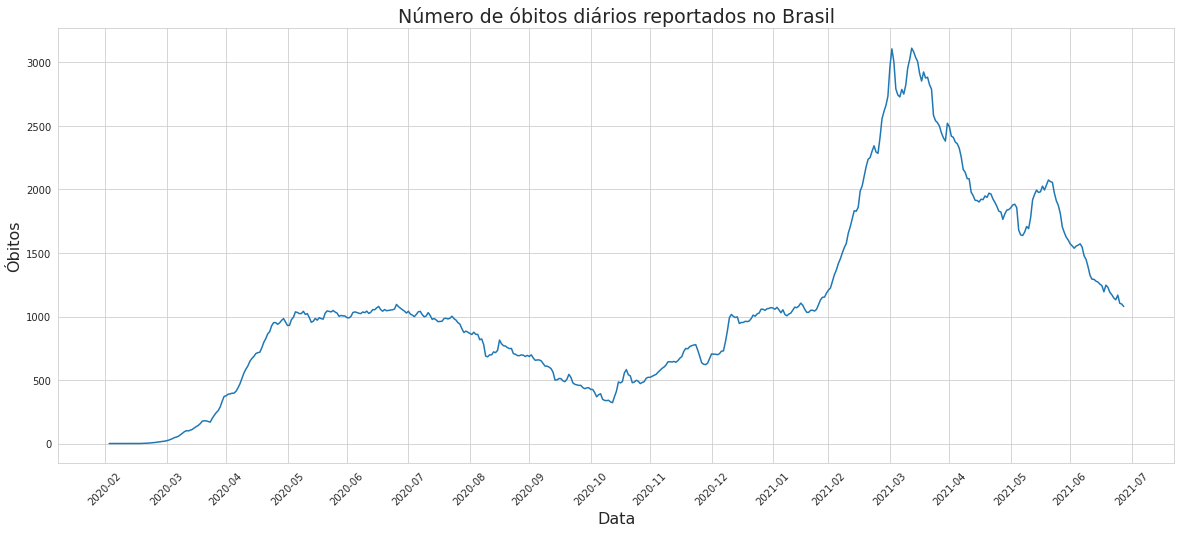

In [32]:
# Mostrar gráfico com número de mortes diárias do Brasil calculada pela média móvel
fig_dims = (20, 8)
fig, axx = plt.subplots(figsize=fig_dims)

ax = sns.lineplot(x = dfEstados.groupby(dfEstados['date'])["new_deaths"].sum().index, 
                 y = dfEstados.groupby(dfEstados['date'])["new_deaths"].sum().rolling(window=7).mean(), 
                ax=axx, ci = 200)
ax.set_ylabel("Óbitos", fontsize = 16)
ax.set_xlabel("Data", fontsize = 16)
ax.set_title("Número de óbitos diários reportados no Brasil", fontsize = 19)
ax.set_xticks(pd.date_range(start="2020-02",end="2021-08", freq='M'))
ax.set_xticklabels(pd.date_range(start="2020-02",end="2021-08", freq='M', closed=None).strftime('%Y-%m'),rotation = 45)
plt.show()

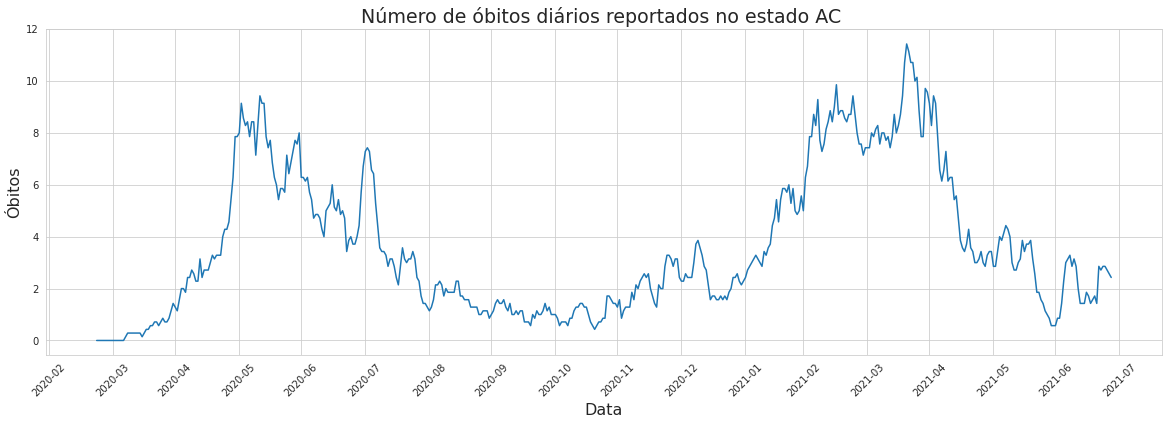

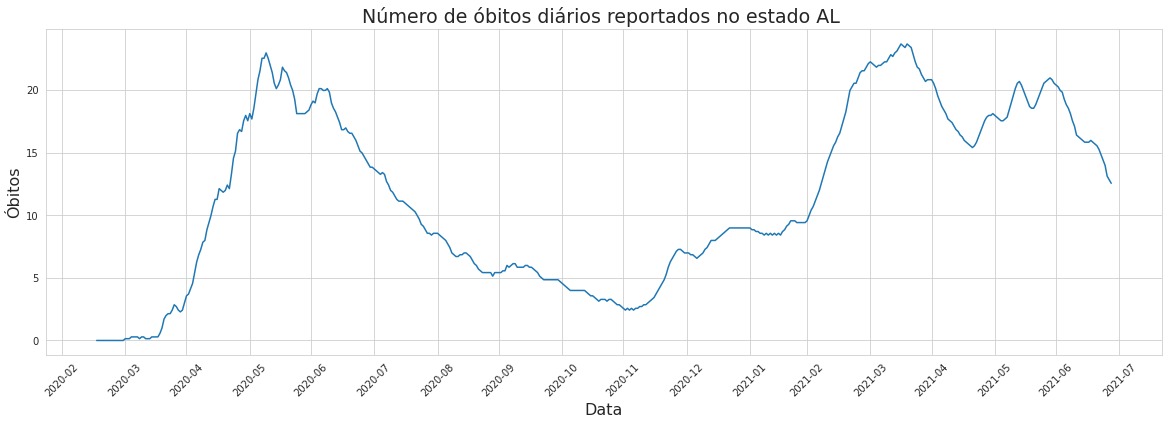

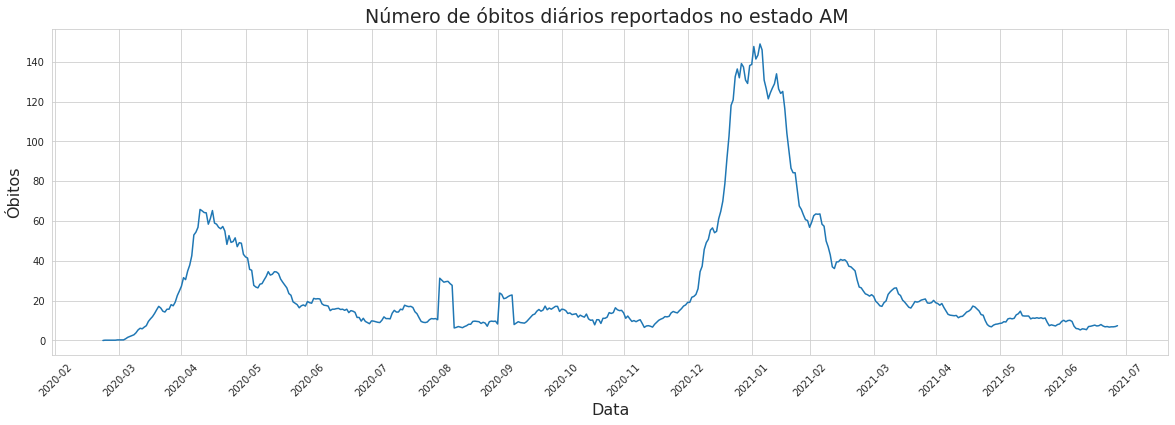

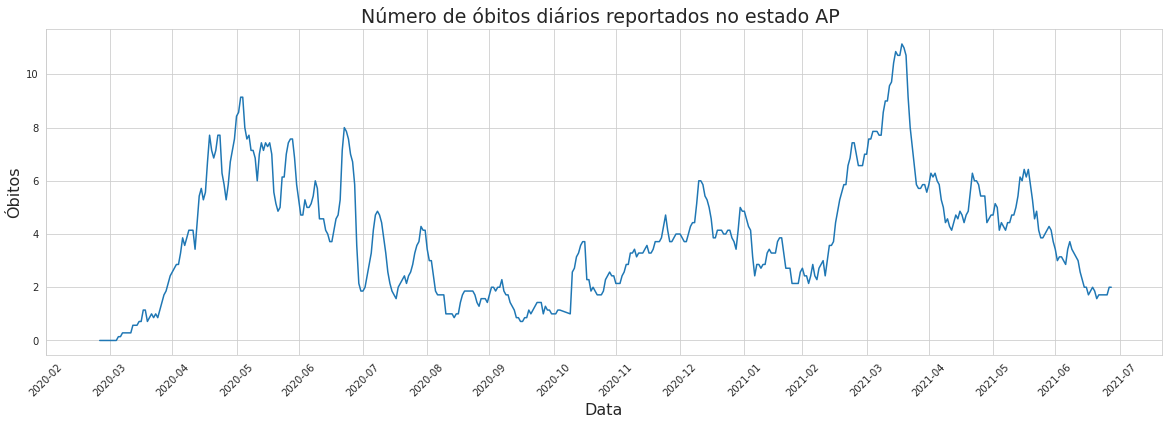

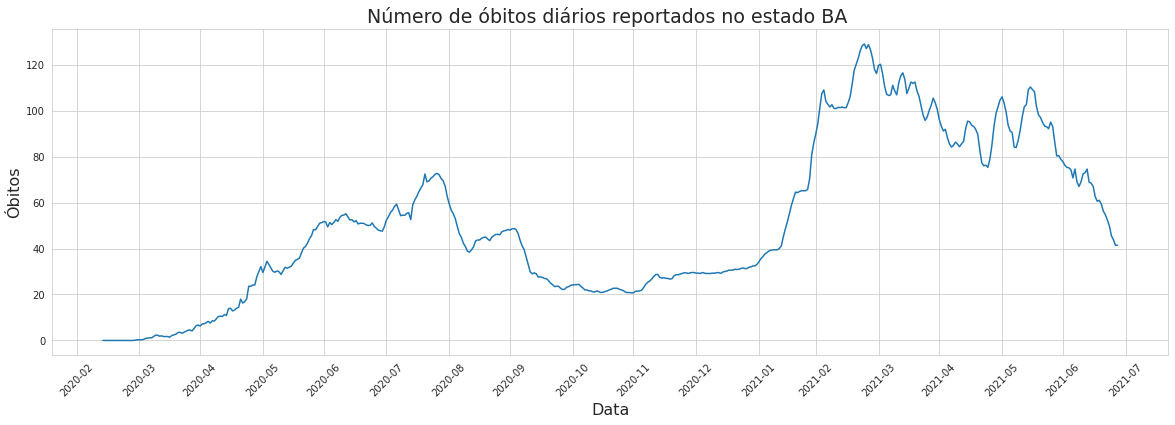

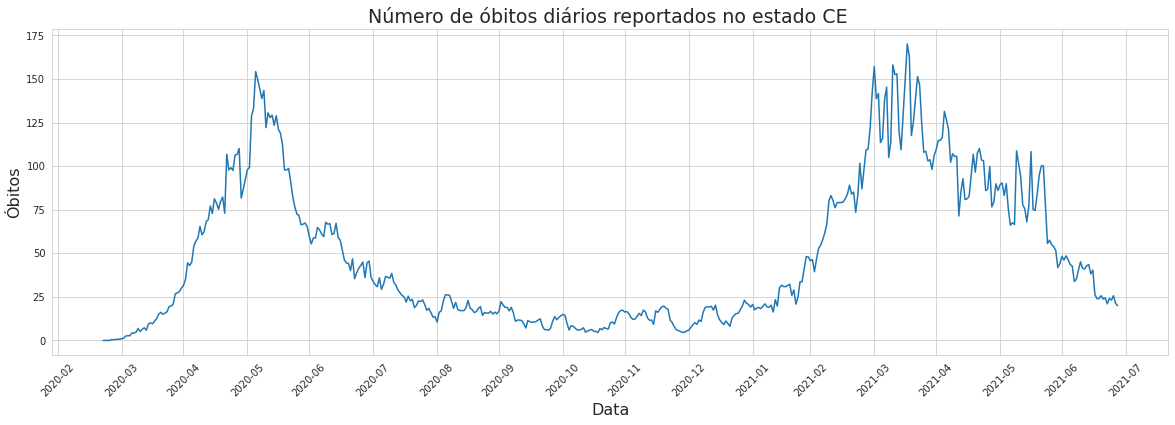

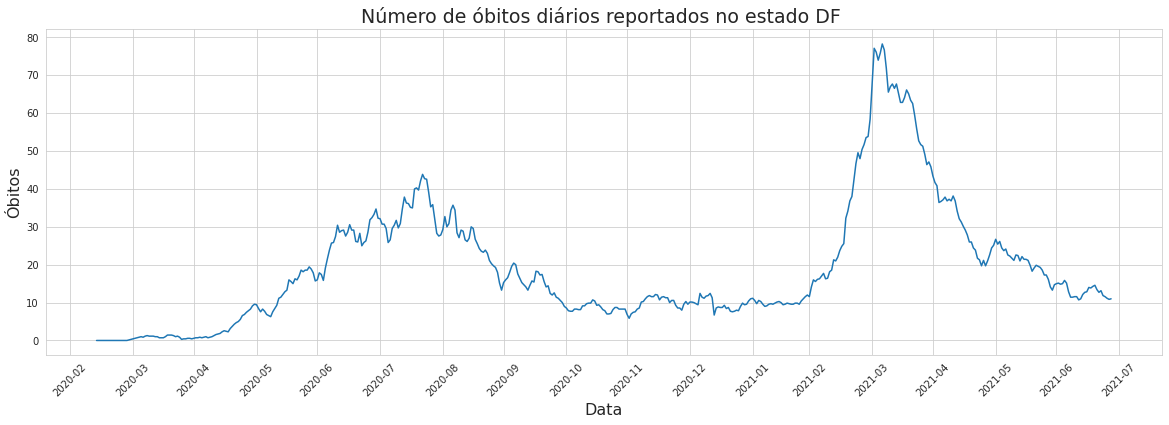

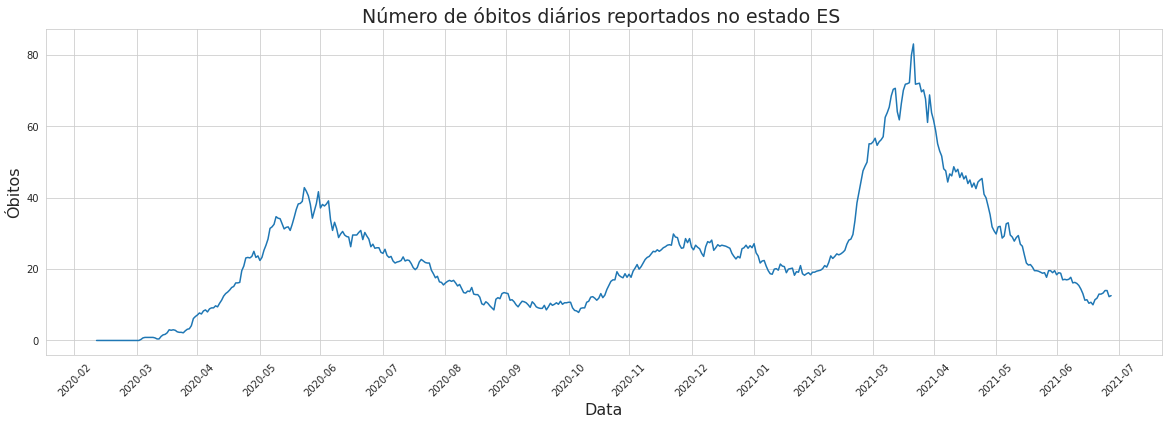

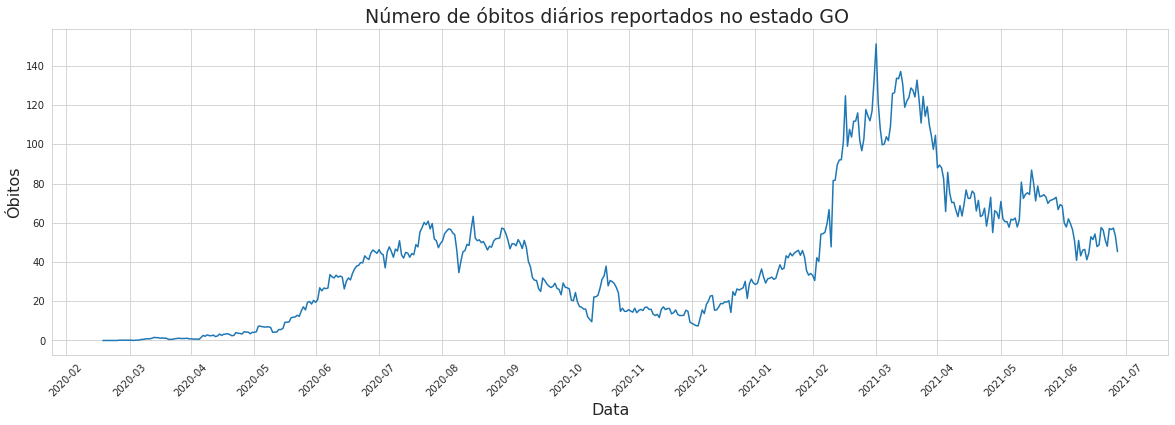

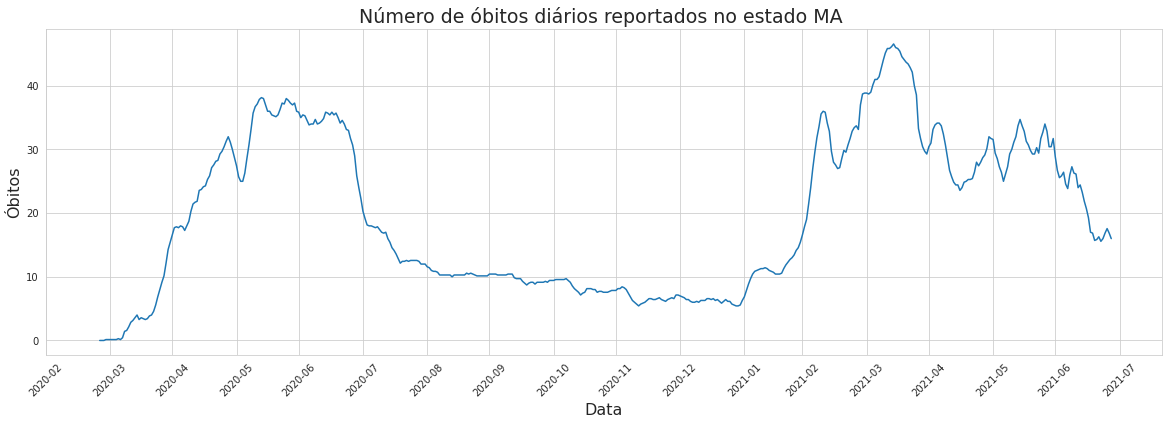

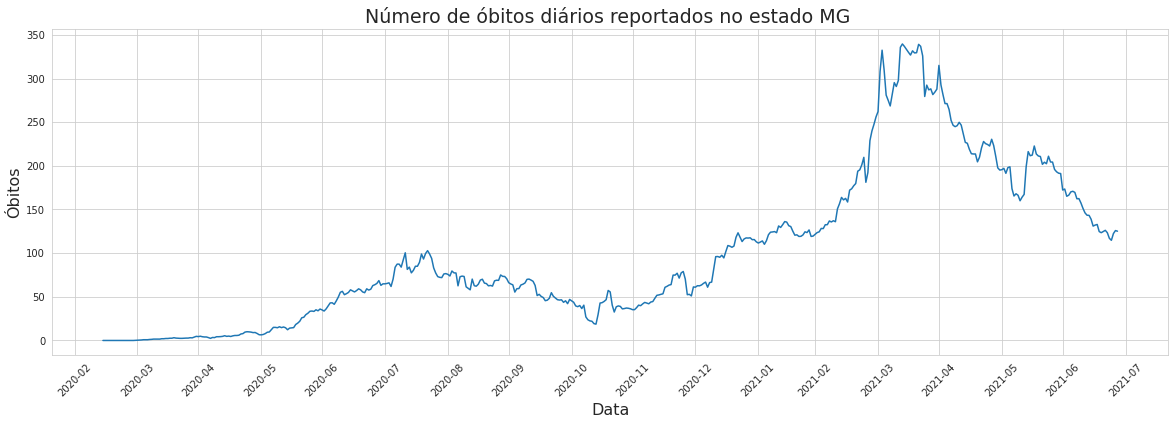

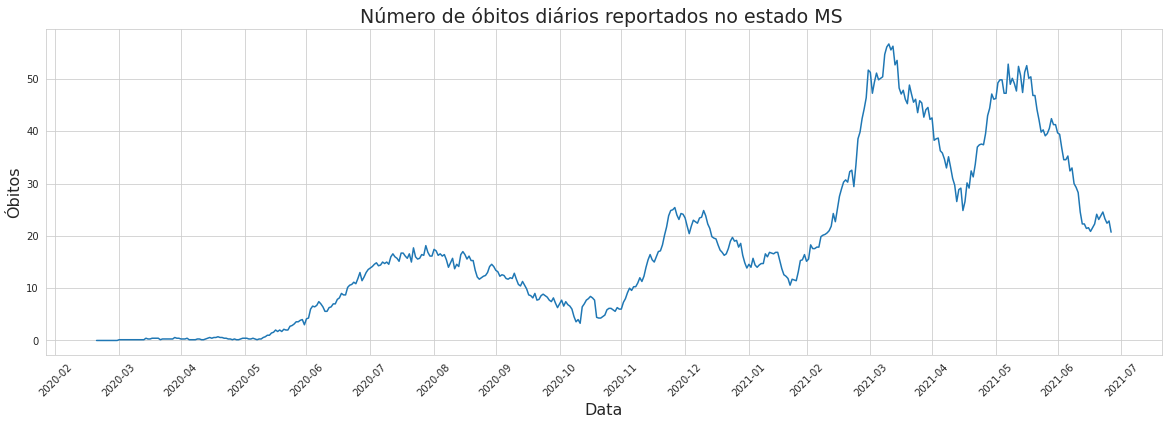

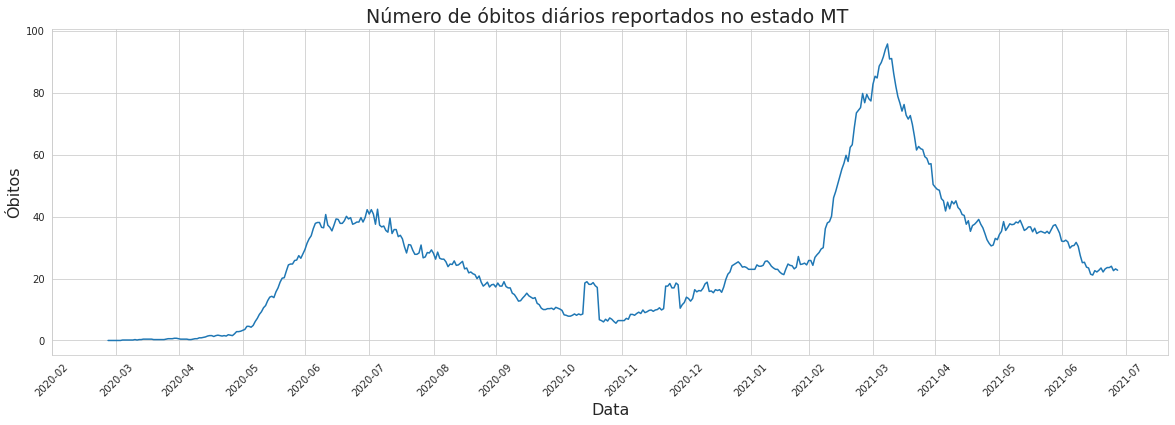

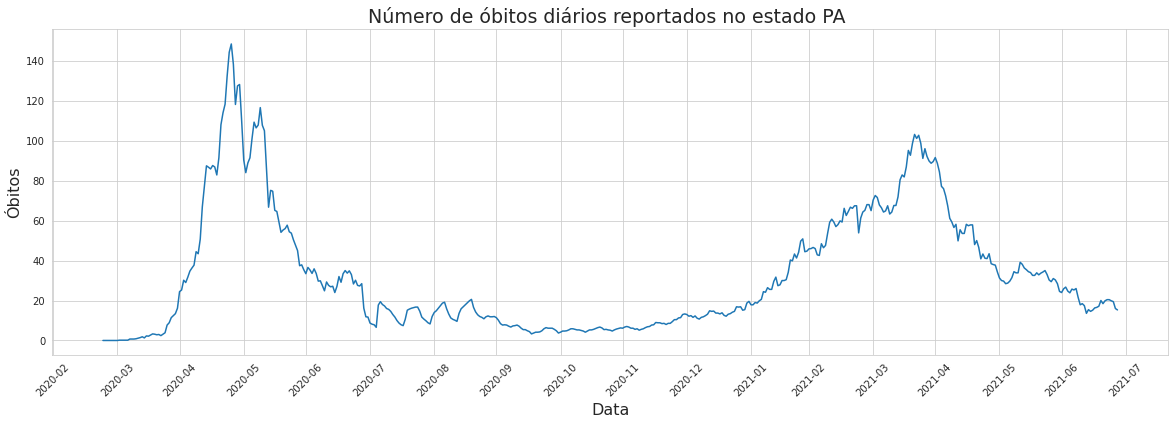

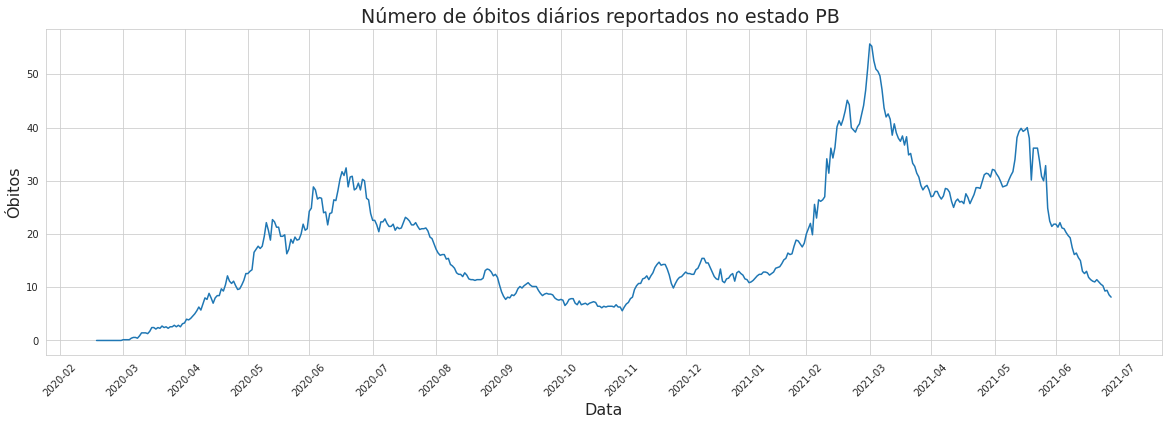

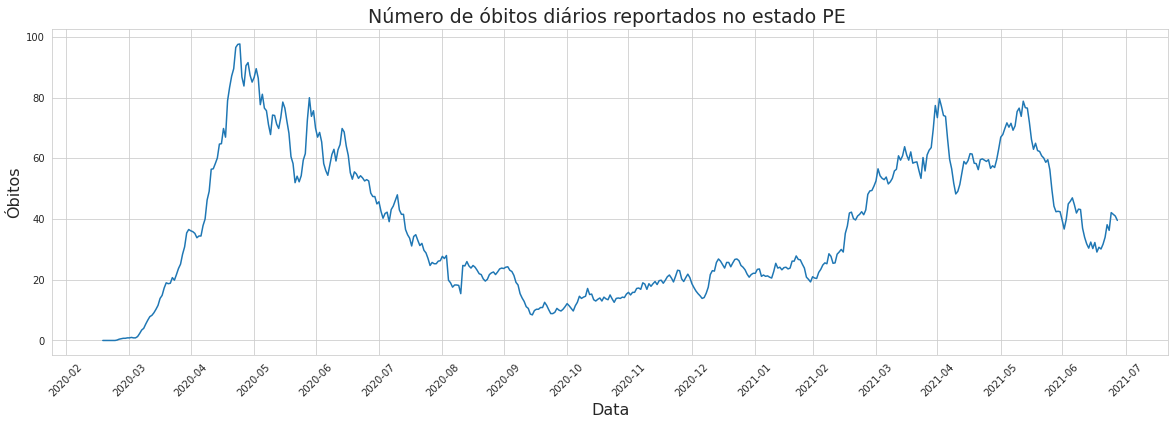

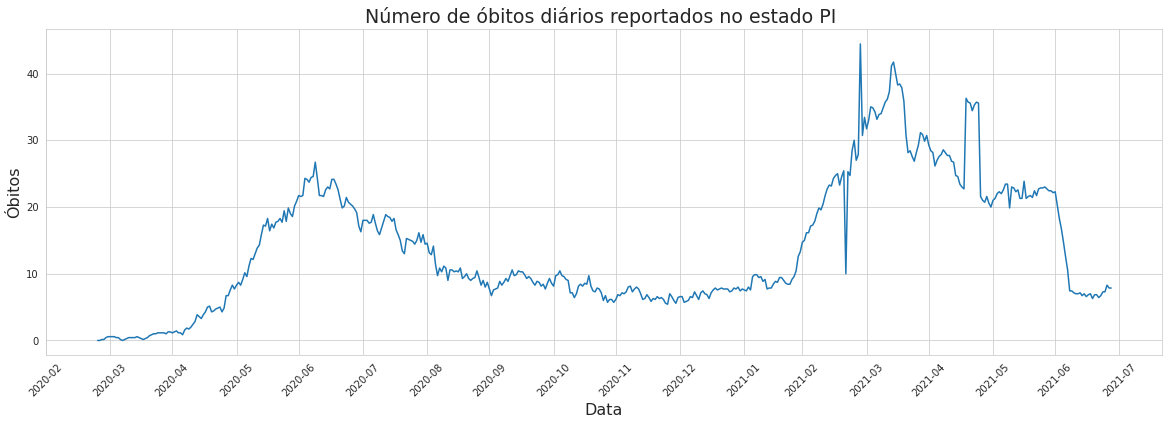

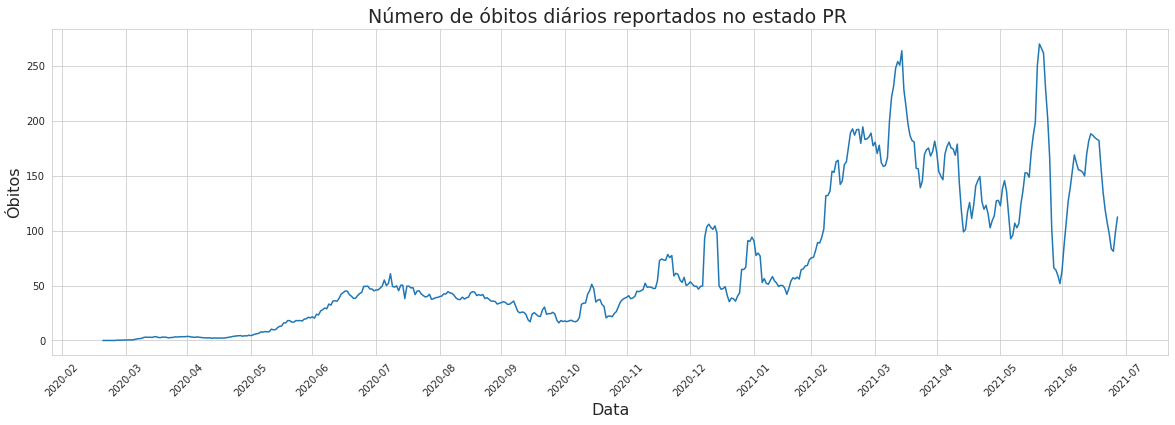

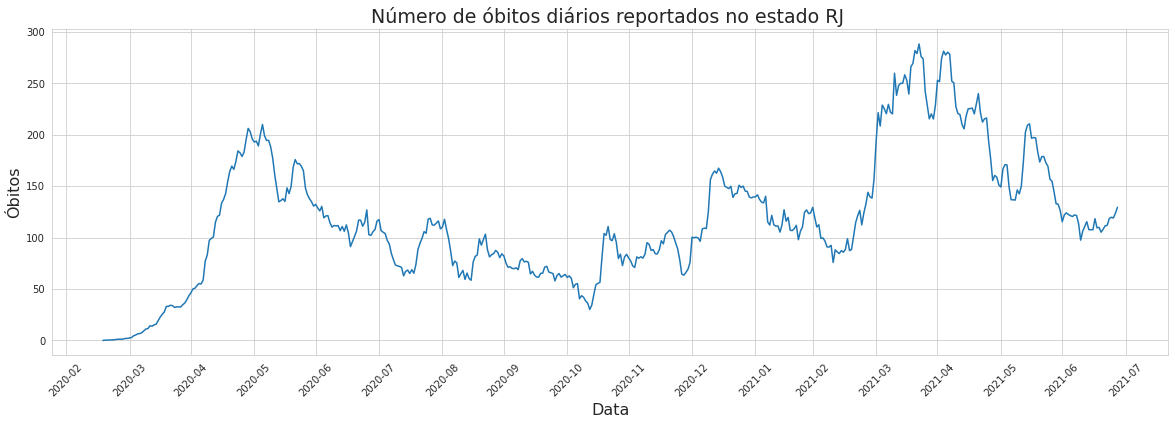

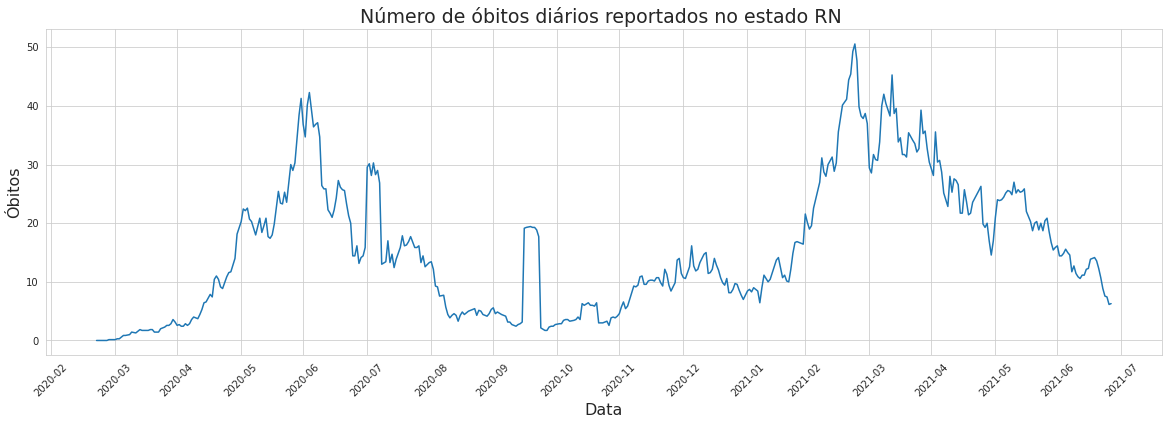

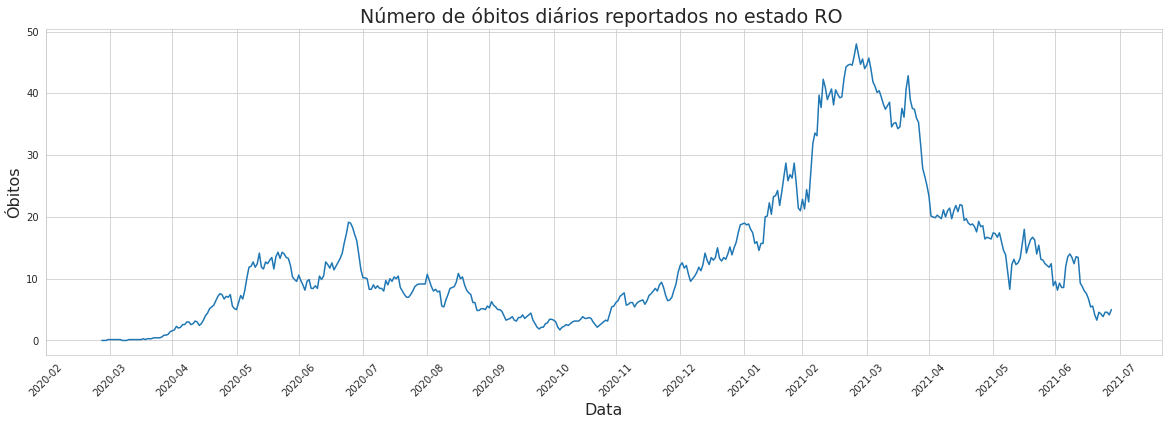

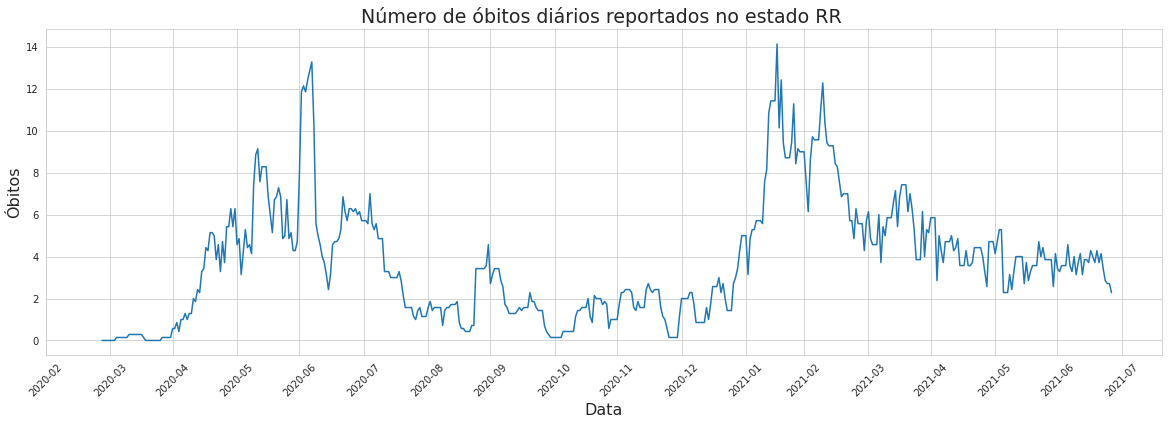

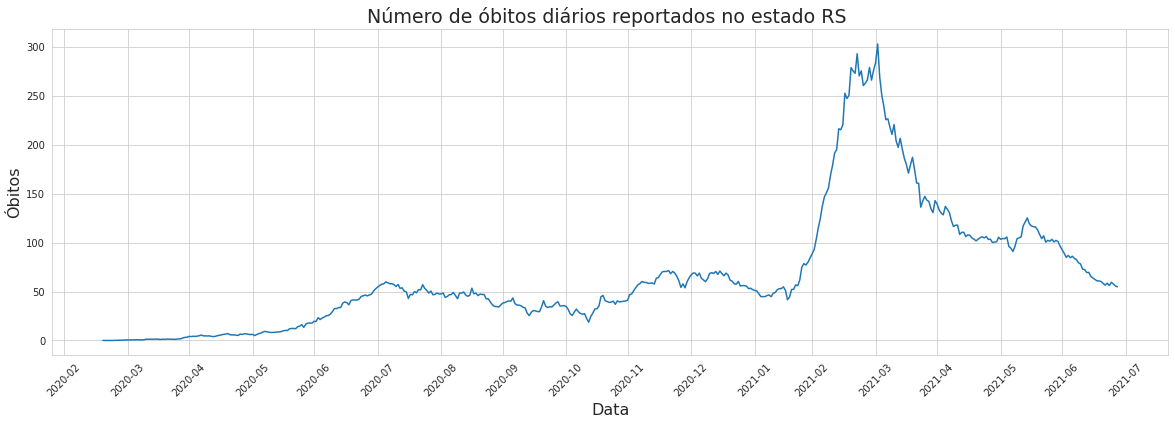

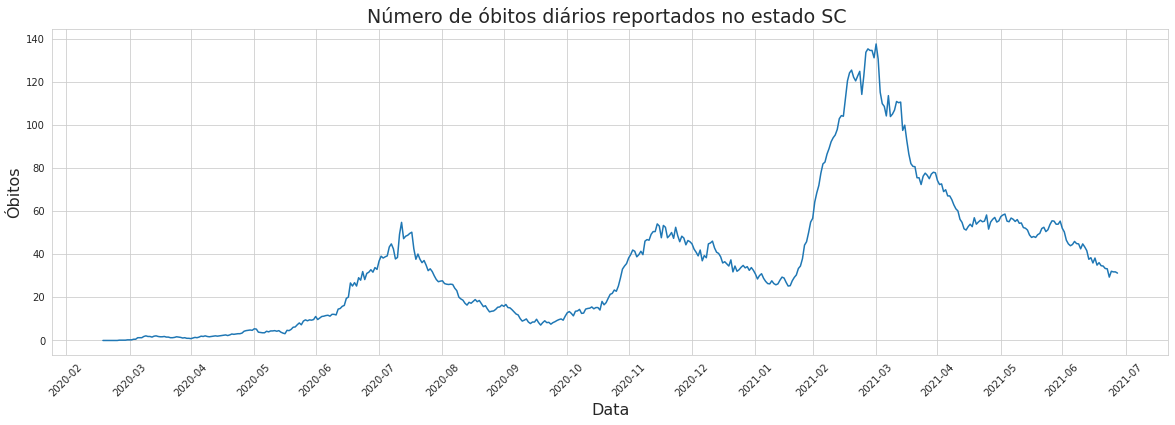

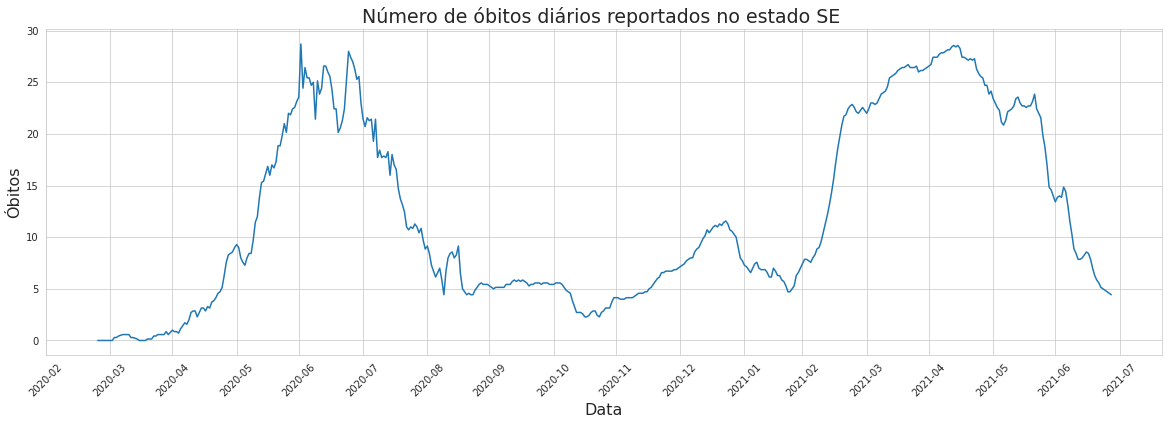

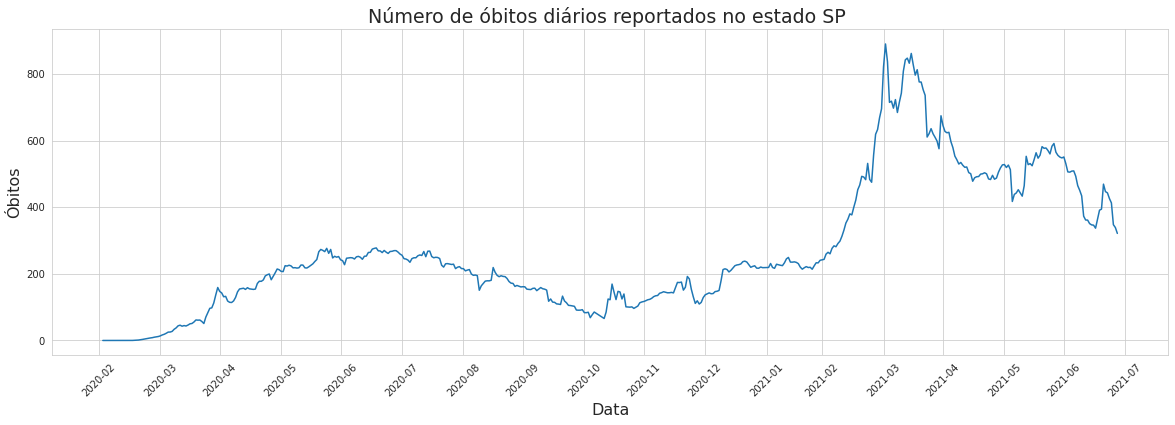

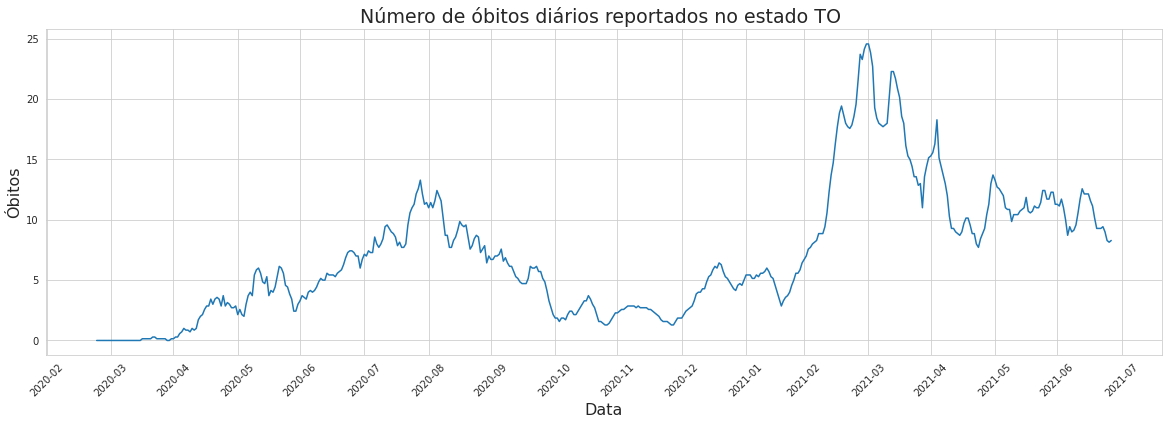

In [33]:
# Mostrar gráfico com número de mortes diárias de cada estado calculada pela média móvel
for i in (dfEstados['state'].unique()):
  
  fig_dims = (20, 6)
  fig, axx = plt.subplots(figsize=fig_dims)

  ax = sns.lineplot(x = dfEstados[(dfEstados['state'] == i)]['date'], 
                    y = dfEstados[dfEstados['state'] == i]["new_deaths"].rolling(window=7).mean(), 
                    ax=axx, ci = 200)
  ax.set_ylabel("Óbitos", fontsize = 16)
  ax.set_xlabel("Data", fontsize = 16)
  ax.set_title("Número de óbitos diários reportados no estado "+ i + ' ', fontsize = 19)
  ax.set_xticks(pd.date_range(start="2020-02",end="2021-08", freq='M'))
  ax.set_xticklabels(pd.date_range(start="2020-02",end="2021-08", freq='M', closed=None).strftime('%Y-%m'),rotation = 45)
  plt.show()

É possível observar que utilizando os dados de média móvel, a sasionalidade do número de mortes em relação aos dias de meio de semana e de final de semana é minimizada, podendo observar melhor a evolução das mortes por covid, observando os períodos com os maiores números de mortes, que foram chamados de primeira se segunda onda, que aconteceram respectivamente entre junho de 2020 ao final setembro de 2020 e de fevereiro de 2021 até julho de 2021 (onde os dados acabam), porém com uma tentência de queda no número de mortes. 

# Dataset complementar usado com o objetivo de retirar informação sobre os problemas relacionados a saúde mental e comportamental cusadas pela pandemia

## Descrição do dataset **COVIDiSTRESS global survey**.

### Este conjunto de dados foi coletado por meio do COVIDiSTRESS Global Survey - um esforço de diversas instituições públicas e privadas para melhorar a compreensão das experiências humanas durante pandemia do COVID-19, coletados entre 30 de março e 30 de maio de 2020. O conjunto de dados permite um estudo intercultural, com foco em aspectos psicológicos e comportamentais relacionados à pandemia do Coronavirus, como diligências governamentais associadas com o cancelamento de serviços públicos e medidas de isolamento, implementadas em muitos países. O conjunto de dados contém variáveis ​​demográficas, bem como medidas de estresse perceptível (PSS-10), disponibilidade de provisões sociais (SPS-10), confiança em várias autoridades, confiança em medidas governamentais para conter o vírus (confiança OCDE) , traços de personalidade (BFF-15), comportamento perante a pandemia, concordância com o nível de intervenção governamental e conformidade com medidas preventivas, juntamente com um rico conjunto de variáveis ​​exploratórias e questões abertas para escrita em texto. Um consórcio global de 44 países trabalhou em conjunto para construir e traduzir uma pesquisa com variáveis ​​de interesses comuns e recrutou participantes em 47 idiomas e dialetos.

### Link: https://osf.io/z39us/
### Abaixo, a versão traduzida de todas as variáveis contidas no dataset.

### Formato:
### 1. nome_no_dataset: Descrição



---

## Variáveis demográficas



####     1. StartDate: Data de início

####    2. EndDate: Data de Fim
       
   #### 3. Status: IP do entrevistado
       
####    4. Progress: Porcentagem do total de perguntas respondidas pelo entrevistado
       
 ####   5. Duration (in seconds): Duração (em segundos)
       
####    6. Finished: Indica se o entrevistado foi até o final do questionário
       
 ####   7. RecordedDate: Data da resposta do questionário
       
####    8. ResponseId: ID da resposta do questionário
       
####    9. DistributionChannel: Portal que indicou a pesquisa(no dataset todos estão como anônimo).

 ####   10.1. Consent: Texto de apoio explicando o propósito e objetivos da pesquisa e se há consentimento do entrevistado. 
 ####   Caso o valor dessa variável seja 'No', significa que o entrevistado não deu prosseguimento ao questionário. 

 ####   10. UserLanguage: Idioma do entrevistado
       
 ####   11. Dem_age: Idade
       
####    12. Dem_gender: Gênero
       
 ####   13. Dem_edu: Nível de escolaridade
       
 ####   14. Dem_edu_mom: Nível de escolaridade da mãe
       
 ####   15. Dem_employment: Situação de emprego
       
 ####   16. Country: País de residência
       
####    17. Dem_Expat: Vive atualmente fora do que considera ser o seu país de origem?
       
 ####   18. Dem_state: Estado/província
       
 ####   19. Dem_maritalstatus: Estado civil
       
 ####   20. Dem_dependents: Número de dependentes (ou seja, membros da família que dependem de si para apoio. Normalmente crianças)
       
 ####   21. Dem_riskgroup: Você ou algum dos seus parentes próximos (família, amigos próximos) está num grupo de alto risco para o Coronavirus? (por exemplo, grávidas, idosos ou com uma condição médica pré-existente)
       
 ####   22. Dem_islolation: O que melhor descreve a sua situação actual em relação ao isolamento?
       
 ####   23. Dem_isolation_adults: Se em relativo isolamento, quantos outros adultos ficam juntos no mesmo lugar que você?
       
 ####   24. Dem_isolation_kids: Se em relativo isolamento, quantas crianças com menos de 12 anos de idade permanecem juntas no mesmo lugar que você?
       
 ####   25. AD_gain: Imagine que o seu país se está se preparando para o surto de uma doença incomum, que deve matar 600 pessoas. Foram propostos dois programas alternativos para combater a doença. Suponha que a estimativa científica exata das consequências dos programas é a seguinte.   Qual dos dois programas você escolheria?
       
 ####   26. AD_loss: Imagine que o seu país se está se preparando para o surto de uma doença incomum, que deve matar 600 pessoas. Foram propostos dois programas alternativos para combater a doença. Suponha que a estimativa científica exata das consequências dos programas é a seguinte. Qual dos dois programas você escolheria?
       
####   27. AD_check: A pergunta anterior também foi utilizada em outras pesquisas. Reconheceu-a e, em caso afirmativo, lembrou-se de que se tratava o estudo original? (escolha "sim" para qualquer um dos dois)

-------------

## Na última semana, com que frequência... - 



####    28. Scale_PSS10_UCLA_1: ficou chateado por causa de algo que aconteceu inesperadamente?
       
 ####   29. Scale_PSS10_UCLA_2: sentiu que não conseguia controlar as coisas importantes da sua vida?
       
####    30. Scale_PSS10_UCLA_3: sentiu-se nervoso e "estressado"?
       
####    31. Scale_PSS10_UCLA_4: sentiu confiança na sua capacidade de lidar com os seus problemas pessoais?
       
####    32. Scale_PSS10_UCLA_5: sentiu que as coisas estavam correndo à sua maneira?
       
 ####   33. Scale_PSS10_UCLA_6: sentiu que não conseguia lidar com todas as coisas que tinha que fazer?
       
 ####   34. Scale_PSS10_UCLA_7: foi capaz de controlar as irritações na sua vida?
       
####    35. Scale_PSS10_UCLA_8: sentiu que estava em total controle das coisas?
       
####    36. Scale_PSS10_UCLA_9: sentiu raiva por causa de coisas que estavam fora do seu controle?
       
 ####   37. Scale_PSS10_UCLA_10: sentiu que as dificuldades se acumulavam a tal ponto de não resolvê-las?
       
####    38. Scale_PSS10_UCLA_11: sentiu que lhe faltava companheirismo?
       
 ####   39. Scale_PSS10_UCLA_12: sentiu que não tinha companhia?
       
####    40. Scale_PSS10_UCLA_13: sentiu-se isolado dos outros?
       
 ####   41. OCDE_people_1: Numa escala de zero a dez, em geral, o quanto você confia na maioria das pessoas?
       
 ####   42. OECD_people_2: Numa escala de zero a dez, o quanto você confia na maioria das pessoas que conhece pessoalmente?


## Mesmo que tenha tido muito pouco ou nenhum contato com estas instituições, por favor baseie a sua resposta na sua impressão geral sobre elas. Diga-nos, em uma pontuação de 0 a 10, o quanto você confia em cada uma das instituições abaixo - 


####    43. OECD_insititutions_1: O governo do seu país
       
 ####   44. OECD_insititutions_2: A polícia do seu país
       
 ####   45. OECD_insititutions_3: A administração pública do seu país
       
 ####   46. OECD_insititutions_4: O sistema de saúde do seu país
       
 ####   47. OECD_insititutions_5: A Organização Mundial de Saúde (OMS)
       
  ####  48. OECD_insititutions_6: O esforço do seu país para lidar com o Coronavírus

## Até que ponto concorda que está preocupado com as consequências do Coronavírus ... -



####    49. Corona_concerns_1: ... para si próprio?
       
####    50. Corona_concerns_2: .... para a sua família?
       
####    51. Corona_concerns_3: .... para os seus amigos íntimos?
       
 ####   52. Corona_concerns_4: .... para o seu país?
       
 ####   53. Corona_concerns_5: .... para outros países do mundo inteiro?
       
 ####   54. Trust_countrymeasure: Acredita que o governo do seu país tomou as medidas apropriadas em resposta a pandemia do Coronavírus?

## Muitos países, bem como a Organização Mundial de Saúde (OMS), emitiram algumas diretrizes sobre como se comportar durante a situação do Coronavírus, incluindo normas de higiene, testes e distanciamento social, evitando eventos sociais, afastando-se de pessoas em espaços públicos, evitando sair de casa desnecessariamente, mantendo os seus filhos em casa, etc. Até que ponto concorda com o seguinte? - 



####    55. Compliance_1: Me sinto bem informado sobre as medidas que posso tomar, para ajudar a reduzir a propagação do Coronavírus.
       
####    56. Compliance_2: Fiz tudo o que pude fazer individualmente para reduzir a propagação do Coronavírus.
       
####    57. Compliance_3: Fiz tudo o que podia fazer para manter a distância física em relação aos outros.
       
 ####   58. Compliance_4: Sinto que manter uma distância física dos outros teria um custo elevado para mim.
       
 ####   59. Compliance_5: Confio em que os outros à minha volta sigam diretrizes para impedir a propagação do Coronavírus.
       
 ####   60. Compliance_6: Comprei grandes reservas extra de alimentos ou artigos de mercearia.

## Finalmente, para terminar a primeira parte do questionário, por favor esqueça a situação do Coronavírus por um momento, e pense em si mesmo em dias normais.  Me vejo como uma pessoa que... - 



####    61. BFF_15_1: ... está frequentemente preocupado.
       
 ####   62. BFF_15_2: ... fica facilmente nervoso.
       
 ####   63. BFF_15_3: ... é bom em manter-se calmo em situações estressantes.
       
 ####   64. BFF_15_4: .... gosta de conversar.
       
 ####   65. BFF_15_5: .... é extrovertido e sociável.
       
  ####  66. BFF_15_6: .... é socialmente reservado.
       
  ####  67. BFF_15_7: .... tem muitas ideias novas.
       
####    68. BFF_15_8: ... aprecia a arte e a estética.
       
 ####   69. BFF_15_9: ... tem uma imaginação vívida e consegue pensar em coisas que ainda não existem.
       
 ####   70. BFF_15_10: ... é por vezes indelicado para com os outros.
       
 ####   71. BFF_15_11: ... é tolerante para com os outros.
       
 ####   72. BFF_15_12: ... é gentil e atencioso para com quase todos.
       
 ####   73. BFF_15_13: .... é cuidadoso e meticuloso.
       
 ####   74. BFF_15_14: ... é bastante preguiçoso.
       
 ####  75. BFF_15_15: ... é eficiente quando faz alguma coisa.


## Na situação atual, quanto concorda que se sente angustiado por... - 



####    76. Expl_Distress_1: O meu rendimento do dia-a-dia neste momento
       
 ####   77. Expl_Distress_2: Ser capaz de executar o meu trabalho suficientemente bem
       
 ####   78. Expl_Distress_3: A educação dos meus filhos
       
####    79. Expl_Distress_4: Perspectivas futuras de emprego
       
 ####   80. Expl_Distress_5: Acesso às necessidades diárias como alimentos e outros artigos de mercearia
       
 ####   81. Expl_Distress_6: Não poder participar em atividades e ocasiões sociais
       
 ####   82. Expl_Distress_7: Não poder participar em atividades religiosas
       
####    83. Expl_Distress_8: Lidar com o comportamento dos adultos com quem estou isolado
       
####    84. Expl_Distress_9: Lidar com o comportamento de crianças menores de 12 anos com as quais estou isolado
       
 ####   85. Expl_Distress_10: A economia nacional
       
 ####   86. Expl_Distress_11: Serviços civis como polícia, saneamento, etc.
       
 ####   87. Expl_Distress_12: O risco que eu ou outros que conheço de ser infectado pelo Coronavírus
       
 ####   88. Expl_Distress_13: O risco que eu ou outros que conheço de ser hospitalizado ou morrer de Coronavírus
       
 ####   89. Expl_Distress_14: Preocupação com amigos ou parentes, que vivem longe
       
  ####  90. Expl_Distress_15: Ter de adaptar o meu trabalho às plataformas digitais
       
 ####   91. Expl_Distress_16: Ter de adaptar a minha vida social às plataformas digitais
       
 ####   92. Expl_Distress_17: Sentir vergonha de agir de forma diferente em relação a outras pessoas (por exemplo, no trabalho, mercados, etc)
       
 ####   93. Expl_Distress_18: Solidão
       
 ####   94. Expl_Distress_19: Quanto tempo passo dentro de casa
       
 ####   95. Expl_Distress_20: Quanto tempo passo na companhia de outras pessoas
       
 ####   96. Expl_Distress_21: Não saber os desdobramentos relacionados ao o Coronavírus
       
 ####   97. Expl_Distress_22: Não saber o que devo fazer para limitar a propagação do Coronavírus
       
 ####   98. Expl_Distress_23: Sem saber por quanto tempo medidas como distanciamento social ou lojas/escolas/restaurantes fechados estarão em vigor
       
 ####   99. Expl_Distress_24: Não poder viajar para fora do seu país
       
  ####  100. Expl_Distress_txt: Outro?

## Agora algo muito importante: lidar com a situação do Coronavírus.  Na sua vida quotidiana atual, em que medida concorda com o seguinte? - 




####    101. SPS_1: Há pessoas de quem posso depender para me ajudarem se realmente precisar dela.
       
 ####   102. SPS_2: Há pessoas que gostam das mesmas atividades sociais que eu.
       
  ####  103. SPS_3: Sinto-me parte de um grupo de pessoas que partilham as minhas atitudes e crenças.
       
   #### 104. SPS_4: Tenho relações próximas que me proporcionam uma sensação de segurança e bem-estar emocional.
       
 ####   105. SPS_5: Há alguém com quem eu poderia falar sobre decisões importantes na minha vida.
       
 ####   106. SPS_6: Tenho relações onde a minha competência e aptidões são reconhecidas.
       
 ####   107. SPS_7: Há uma pessoa de confiança a quem poderia recorrer para obter conselhos se estivesse com problemas.
       
 ####   108. SPS_8: Sinto uma forte ligação emocional com pelo menos uma outra pessoa.
       
 ####   109. SPS_9: Há pessoas que admiram os meus talentos e capacidades.
       
 ####   110. SPS_10: Há pessoas com quem posso contar em caso de emergência.

## Tenho achado o seguinte útil para reduzir sentimentos de desconforto durante a situação do Coronavírus - 



####    111. Expl_Coping_1: Informação do governo
       
####    112. Expl_Coping_2: Interações em pessoa com amigos e familiares
       
####    113. Expl_Coping_3: Chamadas telefônicas ou outras interações de longo alcance com amigos e familiares
       
 ####   114. Expl_Coping_4: Interações em pessoa com os colegas
       
 ####   115. Expl_Coping_5: Chamadas telefônicas ou outras interações de longo alcance com colegas
       
 ####   116. Expl_Coping_6: Mídias sociais
       
 ####   117. Expl_Coping_7: Jogos de vídeo game (sozinho)
       
  ####  118. Expl_Coping_8: Jogos de vídeo game (online)

 ####   119. Expl_Coping_9: Ver programas de tv ou filmes
       
 ####   120. Expl_Coping_10: Dedicando-me a ajudar os outros
       
 ####   121. Expl_Coping_11: Dedicando-me à preparação para a crise
       
 ####   122. Expl_Coping_12: Dedicando-me a seguir os conselhos do governo
       
 ####   123. Expl_Coping_13: Dedicando-me ao meu trabalho/vocação
       
####    124. Expl_Coping_14: Dedicar-me a uma atividade ou passatempo
       
 ####   125. Expl_Coping_15: Deus, religião ou espiritualidade
       
 ####   126. Expl_Coping_16: Conhecimento das ações empreendidas pelo governo ou pelos serviços públicos

## Durante o período em que o Vírus de Corona teve impacto no seu país... - 


####    127. Expl_media_1: Tenho procurado informações do governo do país com mais frequência do que o habitual.
       
 ####   128. Expl_media_2: Tenho procurado informações junto de noticiários independentes no país com mais frequência do que é habitual.
       
####    129. Expl_media_3: Tenho procurado informações junto de agências noticiosas fora do país com mais frequência do que é habitual.
       
####    130. Expl_media_4: Tenho procurado informações de amigos e familiares com mais frequência do que é habitual.
       
 ####   131. Expl_media_5: Tenho procurado informações através de mídias sociais com mais frequência do que é habitual.
       
 ####   132. Expl_media_6: Tenho ouvido mais histórias positivas do que negativas sobre o comportamento das pessoas durante o Coronavírus.
       
####    133. Final_open: Finalmente, se houver mais alguma coisa na sua vida que sinta ter impacto na sua segurança, bem-estar ou que tenha geralmente mudado durante o Coronavírus, por favor escreva alguns comentários abaixo para que os investigadores internacionais saibam.



---


# Importação dos dados

### O banco de dados brutos está  divido em 9 planilhas csv com dados de todos os países.

In [34]:
df0 = pd.read_csv('/content/drive/MyDrive/BootCampElo_datasets/COVIDiSTRESS#1(6April2020)/COVIDiSTRESS import April 6 2020 (choice values).csv', low_memory=False)
df1 = pd.read_csv('/content/drive/MyDrive/BootCampElo_datasets/COVIDiSTRESS#2(13April2020)/COVIDiSTRESS data extraction ->April 13 (choice values).csv', low_memory=False)
df2 = pd.read_csv('/content/drive/MyDrive/BootCampElo_datasets/COVIDiSTRESS#3(20April2020)/COVIDiSTRESS  global survey April 20 (choice text).csv', low_memory=False)
df3 = pd.read_csv('/content/drive/MyDrive/BootCampElo_datasets/COVIDiSTRESS#4(27April2020)/COVIDiSTRESS  global survey April 27 (choice text).csv', low_memory=False)
df4 = pd.read_csv('/content/drive/MyDrive/BootCampElo_datasets/COVIDiSTRESS#5(4May2020)/COVIDiSTRESS global survey May 4 2020 (choice text).csv', low_memory=False)
df5 = pd.read_csv('/content/drive/MyDrive/BootCampElo_datasets/COVIDiSTRESS#6(11May2020)/COVIDiSTRESS global survey May 11 2020 (choice text).csv', low_memory=False)
df6 = pd.read_csv('/content/drive/MyDrive/BootCampElo_datasets/COVIDiSTRESS#7(18May2020)/COVIDiSTRESS global survey May 18 2020 (choice text).csv', low_memory=False)
df7 = pd.read_csv('/content/drive/MyDrive/BootCampElo_datasets/COVIDiSTRESS#8(25May2020)/COVIDiSTRESS global survey May 25 2020 (choice text).csv', low_memory=False)
df8 = pd.read_csv('/content/drive/MyDrive/BootCampElo_datasets/COVIDISTRESS#9(30 May 2020)/COVIDiSTRESS global survey May 30 2020 (choice text).csv', low_memory=False)


In [35]:
# Extraindo as colunas. Este procedimento se fez necessário pois nos arquivos csv dos dados coletados no 
# final de Abril existiam perguntas adicionais relacionadas a guerra da Bósnia e Herzegovina,
# divergindo do propósito que buscamos.
cols = df0.columns

### Filtrando os dados oriundos do Brasil e concatenando-os.

In [36]:
dfBR0 = df0[df0['Country']=='Brazil']
dfBR1 = df1[df1['Country']=='Brazil']
dfBR2 = df2[df2['Country']=='Brazil']
dfBR3 = df3[df3['Country']=='Brazil']
dfBR4 = df4[df4['Country']=='Brazil']
dfBR5 = df5[df5['Country']=='Brazil']
df6=df6[cols]
dfBR6 = df6[df6['Country']=='Brazil']
df7=df7[cols]
dfBR7 = df7[df7['Country']=='Brazil']
df8=df8[cols]
dfBR8 = df8[df8['Country']=='Brazil']
#Concatenando todos os dados coletados no Brasil

dfBR = pd.concat([dfBR0, dfBR1, dfBR3, dfBR4, dfBR5, dfBR6, dfBR7, dfBR8])

Observamos na próxima célula o total de entradas oriundas do Brasil: 5068

In [37]:
dfBR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5068 entries, 9389 to 172709
Columns: 135 entries, StartDate to Final_open
dtypes: object(135)
memory usage: 5.3+ MB


-----------------------------------------------------------------

### Excluindo colunas que serão desnecessárias

In [38]:
colsDrop = ['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)', 'Finished', 'ResponseId',
           'DistributionChannel', 'AD_gain', 'AD_loss', 'AD_check', 'Expl_Distress_txt', 'Final_open']
dfBR.drop(columns=colsDrop, inplace=True)

In [39]:
dfBR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5068 entries, 9389 to 172709
Columns: 122 entries, RecordedDate to Expl_media_6
dtypes: object(122)
memory usage: 4.8+ MB


### Selecionando para análise apenas usuários que responderam pelo menos 50% do questionário

In [40]:
dfBR = dfBR[dfBR.isnull().sum(axis=1) < (len(dfBR.columns)/2)]

832 linhas excluídas

In [41]:
dfBR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4236 entries, 9389 to 172709
Columns: 122 entries, RecordedDate to Expl_media_6
dtypes: object(122)
memory usage: 4.0+ MB


### Verificando as variáveis categóricas presentes no dataset


In [42]:

print(dfBR["Dem_Expat"].unique())
print(dfBR["Dem_gender"].unique())
print(dfBR["UserLanguage"].unique())
print(dfBR["Dem_edu"].unique())
print(dfBR["Dem_edu_mom"].unique())
print(dfBR["Dem_employment"].unique())
print(dfBR["Dem_state"].unique())
print(dfBR["Dem_maritalstatus"].unique())
print(dfBR["Dem_islolation"].unique())
print(dfBR["Scale_PSS10_UCLA_1"].unique())
print(dfBR["OECD_insititutions_1"].unique())
print(dfBR["Corona_concerns_1"].unique())
print(dfBR["Compliance_1"].unique())
print(dfBR["BFF_15_1"].unique())
print(dfBR["Expl_Distress_1"].unique())
print(dfBR["SPS_1"].unique())
print(dfBR["Expl_Coping_1"].unique())

['no' 'yes' nan]
['Female' 'Male' nan 'Other/would rather not say']
['PT-BR' 'PT' 'EN' 'FR' 'SME' 'DE' 'HR' 'SAR']
['- College degree, bachelor, master'
 '- Some College, short continuing education or equivalent'
 '- Up to 12 years of school ' '- PhD/Doctorate' nan]
['- College degree' '- Up to 12 years of school ' '- PhD/Doctorate'
 '- Up to 9 years of school' '- Up to 6 years of school'
 '- Some College or equivalent' '- None' nan]
['Not employed' 'Student' 'Full time employed' 'Self-employed'
 'Part time employed' 'Retired']
['Rio de Janeiro' 'RJ' 'São Paulo' 'Paraíba' 'Rj' 'rio de janeiro'
 'Rio de janeiro' 'Bahia' 'Rio de Janeiro ' 'Rio Grande do Sul' 'Paraiba'
 'Pára' 'Brasilia' 'Sp' nan 'RS' 'Rio de J' 'Rio grande do sul' 'Brésil '
 'Sao Paulo' "pays d'origine: france" 'São Paulo ' 'Rio Grande do Norte'
 'Cabreúva ' 'Rio de Janeirp' 'rio de janeiro ' 'Minas Gerais'
 'Santa Catarina ' 'RJ ' 'Santa Catarina' 'MG' 'Aracaju/Sergipe'
 'Rio de Janeiro (RJ)' 'Brasilia DF' 'Aracaju - Se

### Traduzindo as variáveis dentro do dataset

In [43]:
edu = {'- College degree, bachelor, master': 'Superior Completo/ Mestrado', '- College degree': 'Superior Completo/ Mestrado',
       '- Some College or equivalent': 'Superior Completo/ Mestrado',
       '- Some College, short continuing education or equivalent': 'Superior incompleto', 
       '- Up to 12 years of school ':'Ensino médio', 
       '- PhD/Doctorate' : 'Doutorado', 
       '- Up to 9 years of school':'Ensino fundamental',
       '- Up to 6 years of school' : 'Fundamental incompleto',
       '- None': 'Nenhum'}

dfBR.replace({'Dem_edu': edu}, inplace=True)
dfBR.replace({'Dem_edu_mom': edu}, inplace=True)

In [44]:
dfBR.replace({'Dem_gender':{'Female': 'Feminino', 'Male':'Masculino', 'Other/would rather not say':'Outro'}}, inplace=True)

dfBR.replace({'Dem_employment': {'Not employed': 'Desempregado', 'Student': 'Estudante', 
                                 'Full time employed':'Empregado integralmente', 'Part time employed' : 'Empregado parcialmente', 
                                 'Self-employed':'Autonomo', 'Retired' : 'Aposentado'}}, inplace=True)

dfBR.replace({'Life carries on with minor changes': 'Pequenas mudanças', 'Isolated': 'Isolado', 'Life carries on as usual': 'Nenhuma mudança',
              'Isolated in medical facility of similar location':'Isolado em instituição de saúde'}, inplace=True)

dfBR.replace({'Sometimes': 'As vezes', 'Fairly often':'Frequentemente',
              'Almost never':'Quase nunca', 'Very often':'Muito frequentemente', 'Never':'Nunca' }, inplace=True)

dfBR.replace({'Slightly agree':'Concordo parcialmente', 'Agree':'Concordo', 'Strongly agree':'Concordo plenamente', 
             'Strongly disagree': 'Discordo plenamente', 'Disagree':'Discordo', 'Slightly disagree':'Discordo parcialmente', 
             'Does not apply to my current situation': 'Não se aplica a mim'}, inplace=True)  
dfBR.replace({'yes':'Sim', 'no':'Não', 'Yes':'Sim', 'No':'Não', 'Not sure':'Não sei'}, inplace=True)

dfBR.replace({'Married/cohabiting': 'Casado/Rel.Estável', 'Single':'Solteiro', 'Divorced/widowed':'Divorciado/Viúvo',
              'Other or would rather not say':'Outro'}, inplace=True)          

### Aplicando um pd.head e vizualisando uma amostra do dataset

In [45]:
dfBR.reset_index(inplace=True, drop=True)
dfBR.head(5)

RecordedDate  ...           Expl_media_6
0  2020-03-30 10:30:21  ...  Concordo parcialmente
1  2020-03-30 10:50:51  ...  Concordo parcialmente
2  2020-03-30 10:52:20  ...               Discordo
3  2020-03-30 11:49:00  ...  Discordo parcialmente
4  2020-03-30 12:45:05  ...  Discordo parcialmente

[5 rows x 122 columns]

## Vizualização dos dados

### Número de brasileiros e estrangeios morando no Brasil que responderam ao questionário

In [46]:
dfBR.groupby(dfBR["Dem_Expat"])["Dem_Expat"].count() # Não:Brasileiro, Sim: estrangeiro

Dem_Expat
Não    3978
Sim     233
Name: Dem_Expat, dtype: int64

### Informação acerca da idade dos participantes:

#### Idades entre 18 e 80 anos, com média de 35 anos


In [47]:
dfBR.Dem_age.astype('float').describe()

count    4220.000000
mean       35.122749
std        13.504614
min        18.000000
25%        23.000000
50%        32.000000
75%        45.000000
max        80.000000
Name: Dem_age, dtype: float64

Gráfico do toal de entrevistados por idade

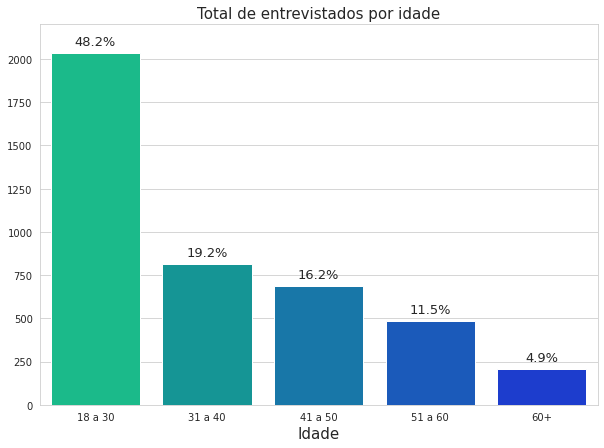

In [48]:
# definindo a dimensão do gráfico
fig_dims = (10, 7)
fig, axx = plt.subplots(figsize=fig_dims)
sns.set_style("whitegrid")

#agrupando as idades
bins= [17,30,40,50,60, 100]
labels = ['18 a 30','31 a 40','41 a 50','51 a 60','60+',]
idadeGrupo = pd.cut(dfBR['Dem_age'].astype(float), bins=bins, labels=labels).value_counts()

#plot
ax = sns.barplot(y=idadeGrupo.values, x=idadeGrupo.index, palette='winter_r')
ax.set_title('Total de entrevistados por idade', fontsize=15)
ax.set_xlabel('Idade', fontsize=15)
ax.set(ylim=(0, 2200))

# colocando as anotações de porcentagem
patches = ax.patches
total = dfBR['Dem_age'].count()/100
for i in range(len(ax.patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()
   percentage = idadeGrupo.values[i]/total
   ax.annotate('{:.1f}%'.format(percentage), (x, y+45), ha='center', fontsize=13)

### Gênero dos entrevistados

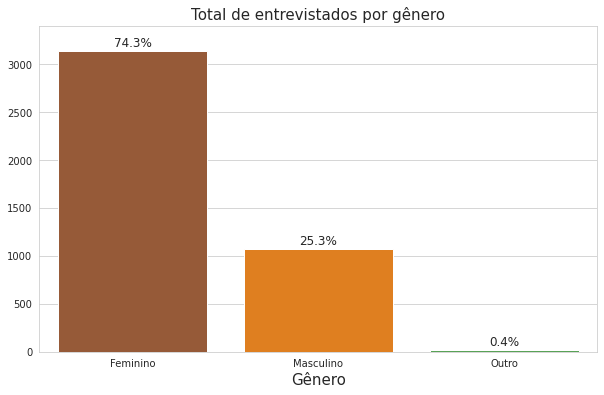

In [49]:
# definindo a dimensão do gráfico
fig_dims = (10, 6)
fig, axx = plt.subplots(figsize=fig_dims)

#plot
ax = sns.barplot(y=dfBR['Dem_gender'].value_counts().values, x=dfBR['Dem_gender'].value_counts().index, 
                 palette='Set1_r', ax=axx)
ax.set_title('Total de entrevistados por gênero', fontsize=15)
ax.set_xlabel('Gênero', fontsize=15)
ax.set(ylim=(0, 3400))

# colocando as anotações de porcentagem
patches = ax.patches
total = dfBR['Dem_gender'].count()/100
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   percentage = dfBR['Dem_gender'].value_counts().values[i]/total
   ax.annotate('{:.1f}%'.format(percentage), (x, y+50), ha='center', fontsize=12)

### Nível de escolaridade dos entrevistados

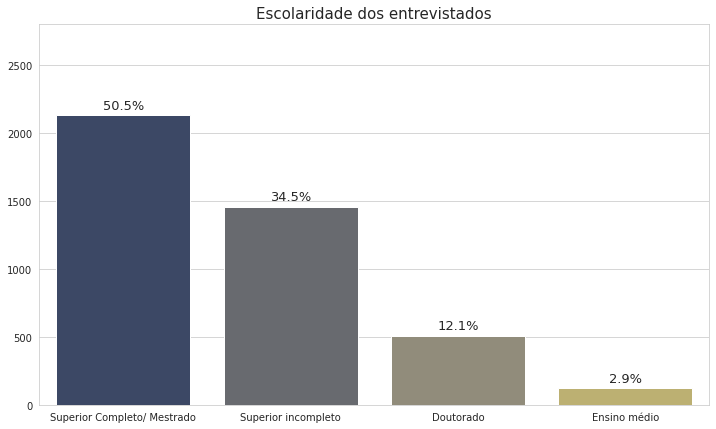

In [50]:
# definindo a dimensão do gráfico
fig_dims = (12, 7)
fig, axx = plt.subplots(figsize=fig_dims)
sns.set_style("whitegrid")

ax = sns.barplot(y = dfBR['Dem_edu'].value_counts().values, x = dfBR['Dem_edu'].value_counts().index, palette='cividis')
ax.set_title('Escolaridade dos entrevistados', fontsize=15)
ax.set(ylim=(0, 2800))

# colocando as anotações de porcentagem
patches = ax.patches
total = dfBR['Dem_edu'].count()/100
for i in range(len(ax.patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()
   percentage = dfBR['Dem_edu'].value_counts().values[i]/total
   ax.annotate('{:.1f}%'.format(percentage), (x, y+45), ha='center', fontsize=13)

### Situação empregatícia

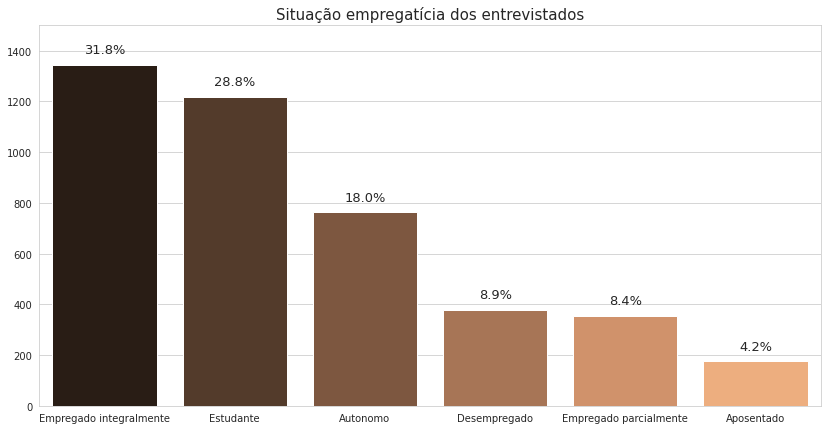

In [51]:
# definindo a dimensão do gráfico
fig_dims = (14, 7)
fig, axx = plt.subplots(figsize=fig_dims)
sns.set_style("whitegrid")

#plot
ax = sns.barplot(y = dfBR['Dem_employment'].value_counts().values, x = dfBR['Dem_employment'].value_counts().index, palette='copper')
ax.set_title('Situação empregatícia dos entrevistados', fontsize=15)
ax.set(ylim=(0, 1500))

# colocando as anotações de porcentagem
patches = ax.patches
total = dfBR['Dem_employment'].count()/100
for i in range(len(ax.patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()
   percentage = dfBR['Dem_employment'].value_counts().values[i]/total
   ax.annotate('{:.1f}%'.format(percentage), (x, y+45), ha='center', fontsize=13)

### Estado civil

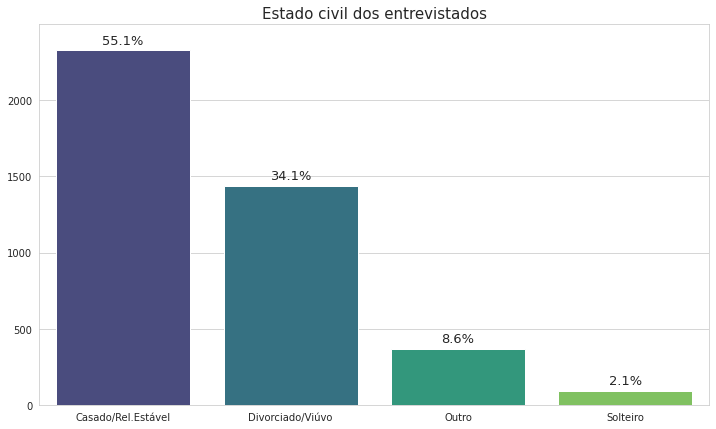

In [52]:
# definindo a dimensão do gráfico
fig_dims = (12, 7)
fig, axx = plt.subplots(figsize=fig_dims)
sns.set_style("whitegrid")

ax = sns.barplot(y = dfBR['Dem_maritalstatus'].value_counts().values, x = dfBR['Dem_maritalstatus'].value_counts().index, palette='viridis')
ax.set_title('Estado civil dos entrevistados', fontsize=15)
ax.set(ylim=(0, 2499))

# colocando as anotações de porcentagem
patches = ax.patches
total = dfBR['Dem_maritalstatus'].count()/100
for i in range(len(ax.patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()
   percentage = dfBR['Dem_maritalstatus'].value_counts().values[i]/total
   ax.annotate('{:.1f}%'.format(percentage), (x, y+45), ha='center', fontsize=13)

### Relação do entrevistado quanto ao isolamento e quanto a convivência com pessoas em grupo de risco

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

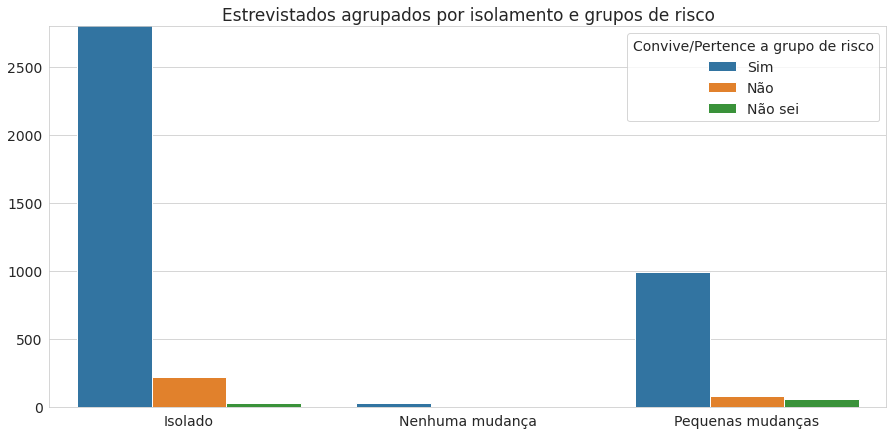

In [53]:
# Criando o dataframe dfIso, que agrupa as variáveis de isolamento com gruppo de risco e o total de indivíduos

isoGroupVals  = dfBR.groupby(['Dem_islolation'])['Dem_riskgroup'].value_counts()

iso=[]
grRisco=[]
for item in isoGroupVals.index:
  iso.append(item[0])
  grRisco.append(item[1])

dfIso = pd.DataFrame(data={'Dem_islolation':iso, 'Dem_riskgroup':grRisco, 'Qntd': isoGroupVals.values})

# definindo a dimensão do gráfico
fig_dims = (15, 7)
fig, axx = plt.subplots(figsize=fig_dims)
sns.set_style("whitegrid")

# plot
ax = sns.barplot(x='Dem_islolation', y='Qntd', hue='Dem_riskgroup', data=dfIso, ax=axx)
plt.legend(title='Convive/Pertence a grupo de risco', fontsize=14, title_fontsize='14')
ax.set_title('Estrevistados agrupados por isolamento e grupos de risco', fontsize=17)
ax.set(ylim=(0, 2800))
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# Visualização dos agrupamentos do questionário

### Respostas dadas em cada seção de perguntas do questionário

### Grupo OECD: Confiança nas instituições

#### Nessa seção é medida a confiança dos entrevistados em algumas instituições

### As respostas variam de 0 a 10, sendo 0 o menos nível de confiança e 10 o maior.

In [54]:
dfOECD = dfBR.iloc[:, 32:38]
dfOECD.columns

Index(['OECD_insititutions_1', 'OECD_insititutions_2', 'OECD_insititutions_3',
       'OECD_insititutions_4', 'OECD_insititutions_5', 'OECD_insititutions_6'],
      dtype='object')

Criando um dataframe em que cada linha representa o total de respostas de cada respectiva variável.

In [55]:
dfHeat = pd.DataFrame()

for i in dfOECD.columns:
  dfHeat[i] = dfOECD[i].value_counts().sort_index()

dfHeat.index = dfHeat.index.astype(int)
dfHeat.sort_index(inplace=True)  

dfHeat.rename(columns={'OECD_insititutions_1' : 'Governo', 'OECD_insititutions_2' : 'Polícia',
                       'OECD_insititutions_3' : 'Adm. Pública', 'OECD_insititutions_4' : 'SUS',
                       'OECD_insititutions_5' : 'OMS', 'OECD_insititutions_6' : 'Esforço do Brasil \n no combate ao COVID'}, 
              inplace=True)
dfHeat

Governo  Polícia  ...  OMS  Esforço do Brasil \n no combate ao COVID
0       763      274  ...   81                                       500
1       670      471  ...   59                                       580
2       701      487  ...  115                                       426
3       591      683  ...  133                                       347
4       475      654  ...  145                                       361
5       346      623  ...  392                                       661
6       178      320  ...  321                                       363
7       140      322  ...  594                                       286
8        95      174  ...  846                                       321
9        26       29  ...  753                                       130
10        3       28  ...  765                                        62

[11 rows x 6 columns]

Text(0.5, 1.0, 'Grau de confiança nas instituições (0 a 10)')

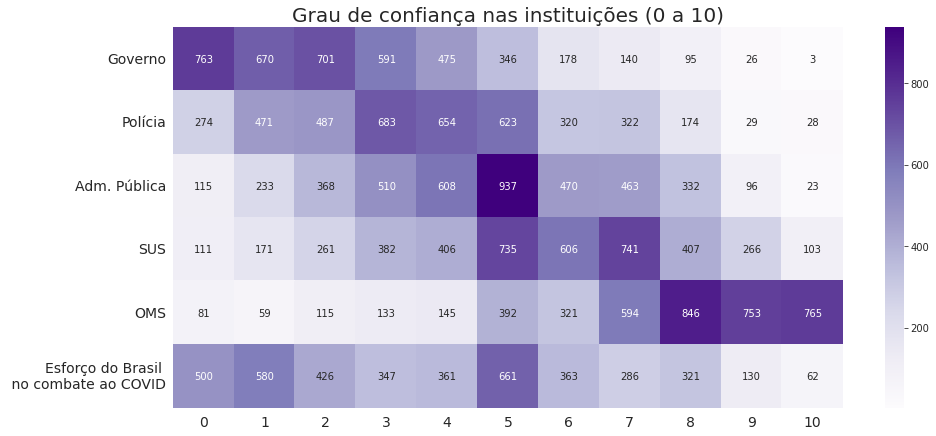

In [56]:
# definindo a dimensão do gráfico
fig_dims = (15, 7)
fig, axx = plt.subplots(figsize=fig_dims)
#plot
ax = sns.heatmap(data=dfHeat.T, cmap="Purples", annot=True, fmt="d")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_title('Grau de confiança nas instituições (0 a 10)', fontsize=20)



--------------------------------------------------------------------------------------------------------------

## Grupo Scale_PSS10_UCLA

### Essa seção está relacionada ao humor do entrevistado na semana anterior ao momento da resposta do questionário.

Criando um dataframe em que cada linha representa o total de respostas de cada respectiva variável.

In [65]:
dfHumor = dfBR.iloc[:, 17:30].apply(pd.value_counts).reindex(index = ['Nunca','Quase nunca','As vezes',
                                                              'Frequentemente','Muito frequentemente'])
dfHumor

Scale_PSS10_UCLA_1  ...  Scale_PSS10_UCLA_13
Nunca                                202  ...                  330
Quase nunca                          833  ...                  691
As vezes                            1657  ...                 1235
Frequentemente                      1086  ...                 1339
Muito frequentemente                 425  ...                  614

[5 rows x 13 columns]

Text(0.5, 1.0, 'Frequência que sentiu... (na semana anterior ao questionário)')

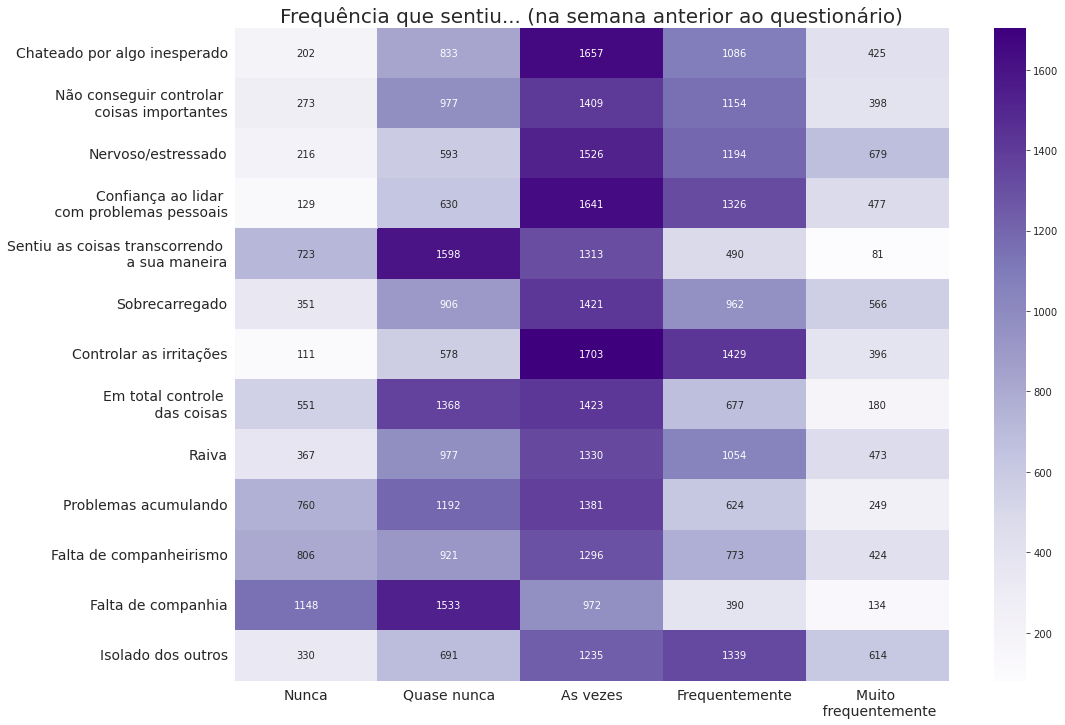

In [67]:
# renomeando as colunas
dfHumor.rename(index={'Muito frequentemente' : 'Muito \n frequentemente'}, inplace=True)
dfHumor.rename(columns={'Scale_PSS10_UCLA_1':'Chateado por algo inesperado', 'Scale_PSS10_UCLA_2' : 'Não conseguir controlar \n coisas importantes',
                        'Scale_PSS10_UCLA_3':'Nervoso/estressado','Scale_PSS10_UCLA_4':'Confiança ao lidar \n com problemas pessoais',
                        'Scale_PSS10_UCLA_5':'Sentiu as coisas transcorrendo \n a sua maneira','Scale_PSS10_UCLA_6':'Sobrecarregado',
                        'Scale_PSS10_UCLA_7':'Controlar as irritações','Scale_PSS10_UCLA_8':'Em total controle \n das coisas',
                        'Scale_PSS10_UCLA_9':'Raiva','Scale_PSS10_UCLA_10':'Problemas acumulando',
                        'Scale_PSS10_UCLA_11':'Falta de companheirismo','Scale_PSS10_UCLA_12':'Falta de companhia',
                        'Scale_PSS10_UCLA_13':'Isolado dos outros'}, 
                inplace=True)

# definindo a dimensão do gráfico
fig_dims = (16, 12)
fig, axx = plt.subplots(figsize=fig_dims)

ax = sns.heatmap( data=dfHumor.T, cmap="Purples", annot=True, fmt="d")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_title('Frequência que sentiu... (na semana anterior ao questionário)', fontsize=20)

## Grupo Corona_concerns

### Nessa seção, os entrevistados responderam sobre o nível de preocupação acerca de diferentes grupos em relação a pandemia.
### Variando de 1 a 6, sendo 1 equivalente a "Discordo plenamente" e 6 "Concordo plenamente".

Criando um dataframe em que cada linha representa o total de respostas de cada respectiva variável.

In [57]:
dfConcern = dfBR.iloc[:, 38:43].apply(pd.value_counts).reindex(index = ['Concordo plenamente','Concordo','Concordo parcialmente',
                                                                        'Discordo parcialmente','Discordo','Discordo plenamente'])


dfConcern.index = [6, 5, 4, 3, 2, 1]
dfConcern.sort_index(inplace=True)
dfConcern.rename(columns={'Corona_concerns_1' : 'Si próprio', 'Corona_concerns_2' : 'Família',
                          'Corona_concerns_3' : 'Amigos', 'Corona_concerns_4' : 'Brasil',
                          'Corona_concerns_5' : 'Outros países'}, 
              inplace=True)

Text(0.5, 1.0, 'Grau de preocupação com as consequências do Coronavírus (1 a 6)')

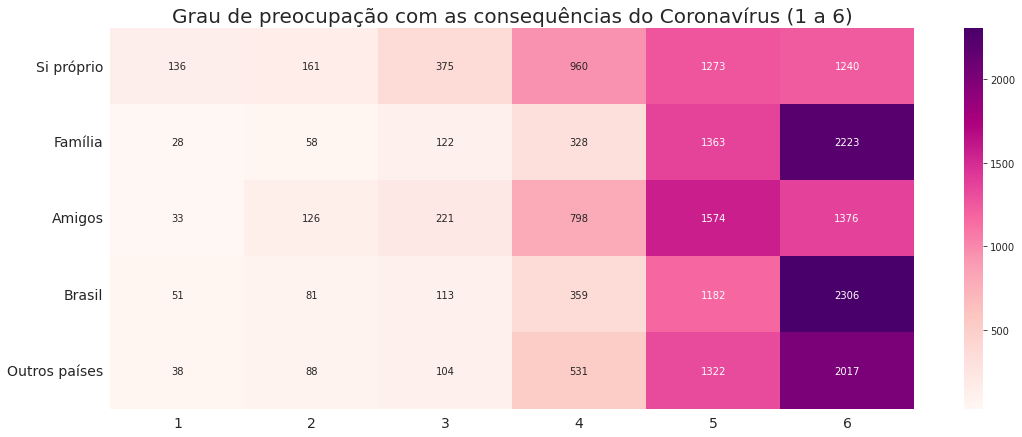

In [58]:
# definindo a dimensão do gráfico
fig_dims = (18, 7)
fig, axx = plt.subplots(figsize=fig_dims)

ax = sns.heatmap( data=dfConcern.T, cmap="RdPu", annot=True, fmt="d")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)
ax.set_title('Grau de preocupação com as consequências do Coronavírus (1 a 6)', fontsize=20)

---------------------------------------------------------------------------------------------------------------

## Grupo Complience

### Nessa seção, as perguntas eram relacionadas ao comprometimento dos entrevistados com medidas de isolamento e as informações acerca da pandemia.

### Variando de 1 a 6, sendo 1 equivalente a "Discordo plenamente" e 6 "Concordo plenamente".

Criando um dataframe em que cada linha representa o total de respostas de cada respectiva variável.



Text(0.5, 1.0, 'Grau de comprometimento com medidas contra o Coronavírus (1 a 6)')

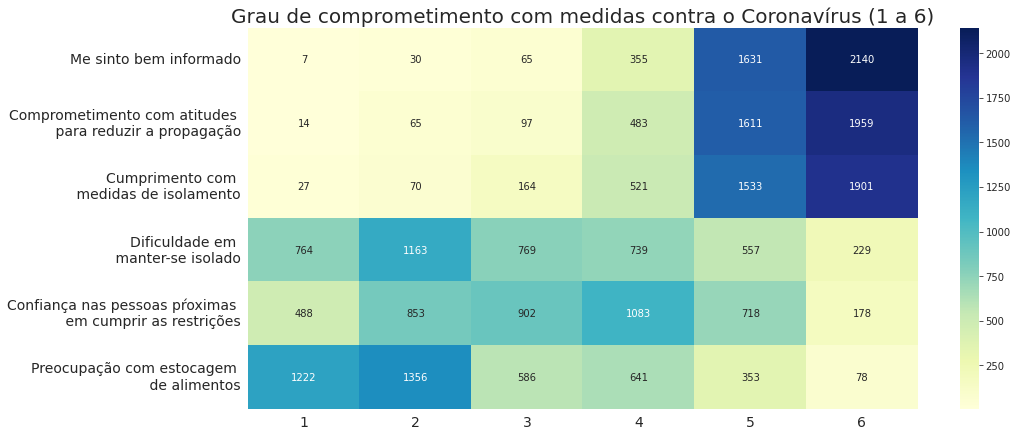

In [59]:
dfCompliance = dfBR.iloc[:, 44:50].apply(pd.value_counts).reindex(index = ['Concordo plenamente','Concordo','Concordo parcialmente',
                                                                        'Discordo parcialmente','Discordo','Discordo plenamente'])

dfCompliance.index = [6, 5, 4, 3, 2, 1]
dfCompliance.sort_index(inplace=True)
dfCompliance.rename(columns={'Compliance_1' : 'Me sinto bem informado', 'Compliance_2' : 'Comprometimento com atitudes \n para reduzir a propagação',
                            'Compliance_3' : 'Cumprimento com \n medidas de isolamento', 'Compliance_4' : 'Dificuldade em \n manter-se isolado',
                            'Compliance_5' : 'Confiança nas pessoas pŕoximas \n em cumprir as restrições', 'Compliance_6' : 'Preocupação com estocagem \n de alimentos'}, 
              inplace=True)


# definindo a dimensão do gráfico
fig_dims = (15, 7)
fig, axx = plt.subplots(figsize=fig_dims)

ax = sns.heatmap( data=dfCompliance.T, cmap="YlGnBu", annot=True, fmt="d")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_title('Grau de comprometimento com medidas contra o Coronavírus (1 a 6)', fontsize=20)


------------------------------------------------------------------------------------------------------

## Grupo Expl_Distress

### Nessa seção os entrevistados indicaram quais era os fatores que mais contribuiam com o aumento de sentimentos de angústia relacionados a pandemia.

### Variando de 1 a 6, sendo 1 equivalente a "Discordo plenamente" e 6 "Concordo plenamente".

Criando um dataframe em que cada linha representa o total de respostas de cada respectiva variável.

In [68]:
dfStress = dfBR.iloc[:, 65:89].apply(pd.value_counts)
dfStress

Expl_Distress_1  ...  Expl_Distress_24
Concordo                           909  ...               483
Concordo parcialmente              716  ...               373
Concordo plenamente                808  ...               493
Discordo                           446  ...               782
Discordo parcialmente              421  ...               390
Discordo plenamente                337  ...              1070
Não se aplica a mim                306  ...               363

[7 rows x 24 columns]

Text(0.5, 1.0, 'Fatores mais relacionados com aumento da angústia (1 a 6)')

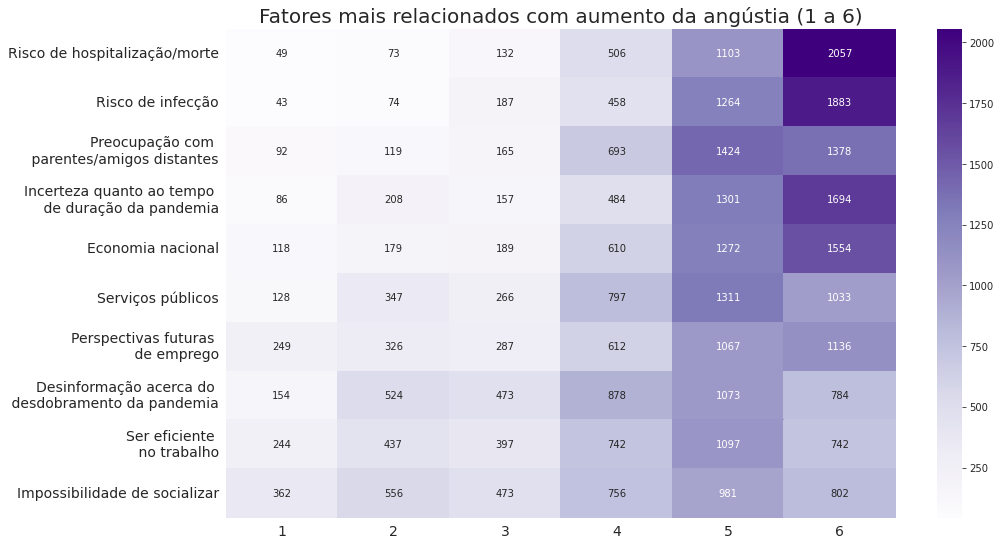

In [69]:
dfStress.drop(index='Não se aplica a mim', inplace=True)

dfStress = dfStress.reindex(index = ['Concordo plenamente','Concordo','Concordo parcialmente',
                          'Discordo parcialmente','Discordo','Discordo plenamente'])

dfStress.index = [6, 5, 4, 3, 2, 1]
dfStress.sort_index(inplace=True)


#selecionando as 10 variáveis relacionadas ao stress que os participantes mais concordam que aumentam o nível de angústia

rank = []
rank_Discord = []
for col in dfStress.columns:
  rank.append(dfStress[col][[4,5,6]].sum())

dfRank = pd.DataFrame(data = dfStress.columns, columns=['Concordancia'], index= rank)
dfRank.sort_index(ascending=False, inplace=True)

varStress = dfRank.Concordancia[:10]
#Dataframe só com as 10 variáveis
dfStress = dfStress[varStress]

dfStress.rename(columns={'Expl_Distress_13' : 'Risco de hospitalização/morte', 'Expl_Distress_12' : 'Risco de infecção',
                          'Expl_Distress_14' : 'Preocupação com \n parentes/amigos distantes', 'Expl_Distress_23' : 'Incerteza quanto ao tempo \n de duração da pandemia',
                          'Expl_Distress_10' : 'Economia nacional', 'Expl_Distress_11' : 'Serviços públicos',
                          'Expl_Distress_4' : 'Perspectivas futuras \n de emprego', 'Expl_Distress_21' : 'Desinformação acerca do \n desdobramento da pandemia',
                          'Expl_Distress_2' : 'Ser eficiente \n no trabalho', 'Expl_Distress_6' : 'Impossibilidade de socializar'
                            }, 
                inplace=True)

# definindo a dimensão do gráfico
fig_dims = (15, 9)
fig, axx = plt.subplots(figsize=fig_dims)

ax = sns.heatmap( data=dfStress.T, cmap="Purples", annot=True, fmt="d")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_title('Fatores mais relacionados com aumento da angústia (1 a 6)', fontsize=20)


----------------------------------------------------------------------------------------------------

## Grupo SPS(Loneliness measurement)

### Nessa seção, as perguntas eram relacionadas a rede de relações interpessoais e sua significância para o indivíduo, através da medida de concordância de questões como:
### "Há pessoas de quem posso depender para me ajudarem se realmente precisar dela."
### "Sinto-me parte de um grupo de pessoas que partilham as minhas atitudes e crenças."
### "Sinto uma forte ligação emocional com pelo menos uma outra pessoa."


Criando um dataframe em que cada linha representa o total de respostas de cada respectiva variável.

In [61]:
relaPlot = dfBR.iloc[:, 89:99].apply(pd.value_counts).reindex(index = ['Concordo plenamente','Concordo','Concordo parcialmente',
                                                              'Discordo parcialmente','Discordo','Discordo plenamente'])
relaPlot

SPS_1  SPS_2  SPS_3  SPS_4  ...  SPS_7  SPS_8  SPS_9  SPS_10
Concordo plenamente    1821.0   1321   1305   1529  ...   1850   2179   1299    1960
Concordo               1308.0   1599   1342   1238  ...   1222   1173   1485    1284
Concordo parcialmente   388.0    559    627    615  ...    384    199    707     312
Discordo parcialmente    56.0    111    178    119  ...     82     62     91      47
Discordo                 76.0     52    173    123  ...     86     36     68      39
Discordo plenamente       NaN     13     38     38  ...     27      8      8      15

[6 rows x 10 columns]

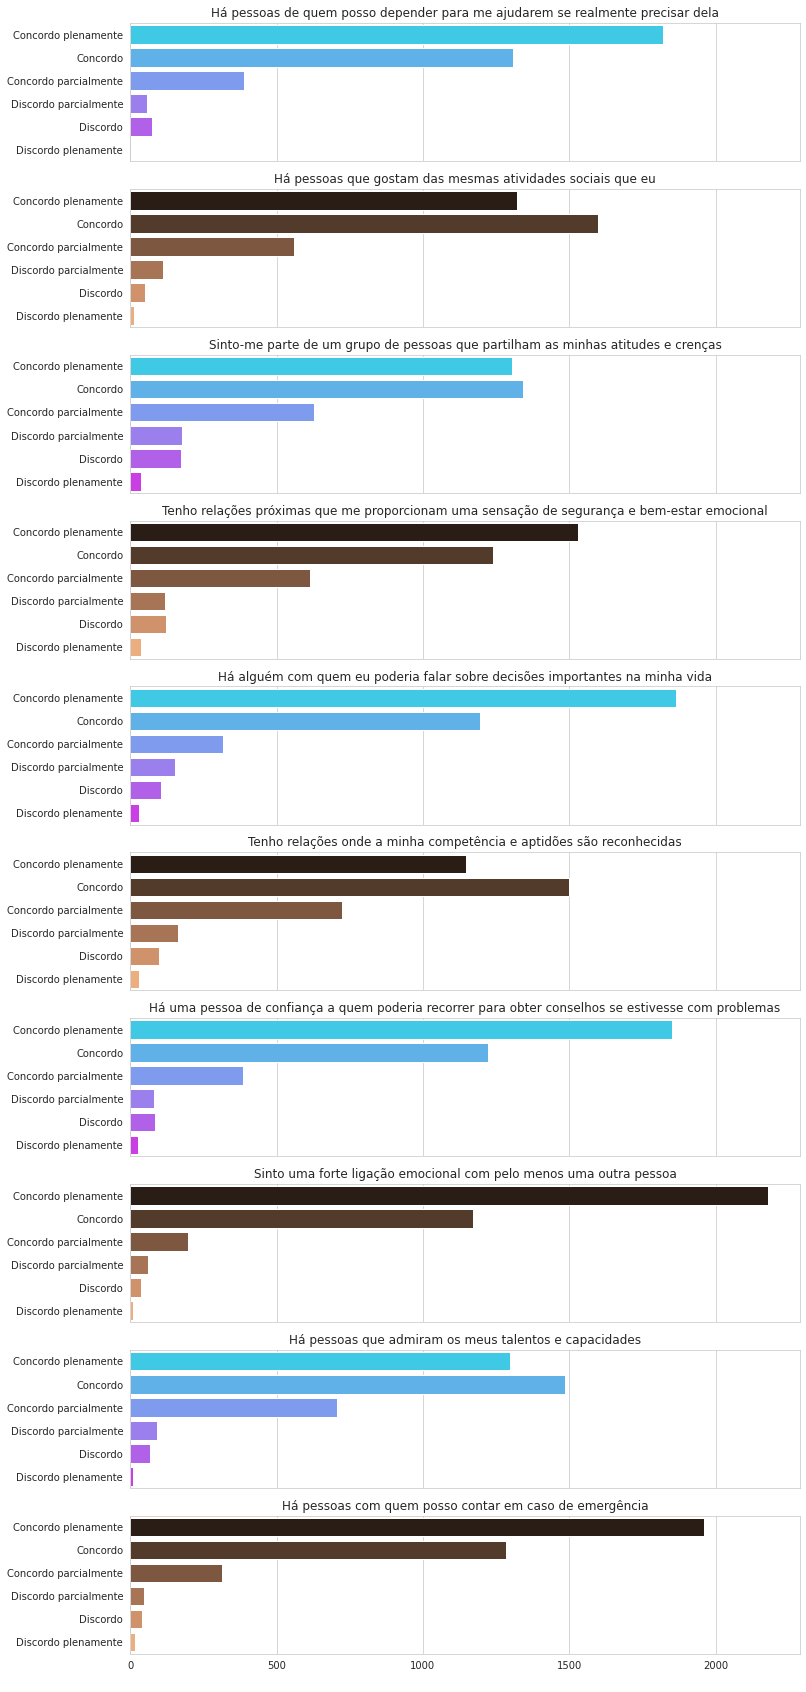

In [70]:
# Subplot com as respostas relacionadas a cada variável dessa seção

figure, axes = plt.subplots(10, 1, sharex=True, figsize=(12,30))

ax1 = sns.barplot(ax=axes[0], x=relaPlot['SPS_1'], y=relaPlot.index, palette='cool').title.set_text('Há pessoas de quem posso depender para me ajudarem se realmente precisar dela')
ax1 =sns.barplot(ax=axes[1], x=relaPlot['SPS_2'], y=relaPlot.index, palette='copper').title.set_text('Há pessoas que gostam das mesmas atividades sociais que eu')
ax1 =sns.barplot(ax=axes[2], x=relaPlot['SPS_3'], y=relaPlot.index, palette='cool').title.set_text('Sinto-me parte de um grupo de pessoas que partilham as minhas atitudes e crenças')
ax1 =sns.barplot(ax=axes[3], x=relaPlot['SPS_4'], y=relaPlot.index, palette='copper').title.set_text('Tenho relações próximas que me proporcionam uma sensação de segurança e bem-estar emocional')
ax1 =sns.barplot(ax=axes[4], x=relaPlot['SPS_5'], y=relaPlot.index, palette='cool').title.set_text('Há alguém com quem eu poderia falar sobre decisões importantes na minha vida')
ax1 =sns.barplot(ax=axes[5], x=relaPlot['SPS_6'], y=relaPlot.index, palette='copper').title.set_text('Tenho relações onde a minha competência e aptidões são reconhecidas')
ax1 =sns.barplot(ax=axes[6], x=relaPlot['SPS_7'], y=relaPlot.index, palette='cool').title.set_text('Há uma pessoa de confiança a quem poderia recorrer para obter conselhos se estivesse com problemas')
ax1 =sns.barplot(ax=axes[7], x=relaPlot['SPS_8'], y=relaPlot.index, palette='copper').title.set_text('Sinto uma forte ligação emocional com pelo menos uma outra pessoa')
ax1 =sns.barplot(ax=axes[8], x=relaPlot['SPS_9'], y=relaPlot.index, palette='cool').title.set_text('Há pessoas que admiram os meus talentos e capacidades')
ax1 =sns.barplot(ax=axes[9], x=relaPlot['SPS_10'], y=relaPlot.index, palette='copper').title.set_text('Há pessoas com quem posso contar em caso de emergência')

for ax in axes.flat:
    ax.set_xlabel(' ')


## Grupo Expl_Coping

### Fatores que as pessoas indicaram como redutores de sentimentos de desconforto durante a pandemia.

Criando um dataframe em que cada linha representa o total de respostas de cada respectiva variável.

In [63]:
dfBR.iloc[:, 99:115].apply(pd.value_counts).reindex(index = ['Concordo plenamente','Concordo','Concordo parcialmente',
                                                              'Discordo parcialmente','Discordo','Discordo plenamente'])

Expl_Coping_1  ...  Expl_Coping_16
Concordo plenamente              218  ...             549
Concordo                         839  ...            1313
Concordo parcialmente           1043  ...             980
Discordo parcialmente            664  ...             339
Discordo                         466  ...             311
Discordo plenamente              427  ...             194

[6 rows x 16 columns]

Text(0.5, 1.0, 'Fatores mais relacionados com diminuição do desconforto (1 a 6)')

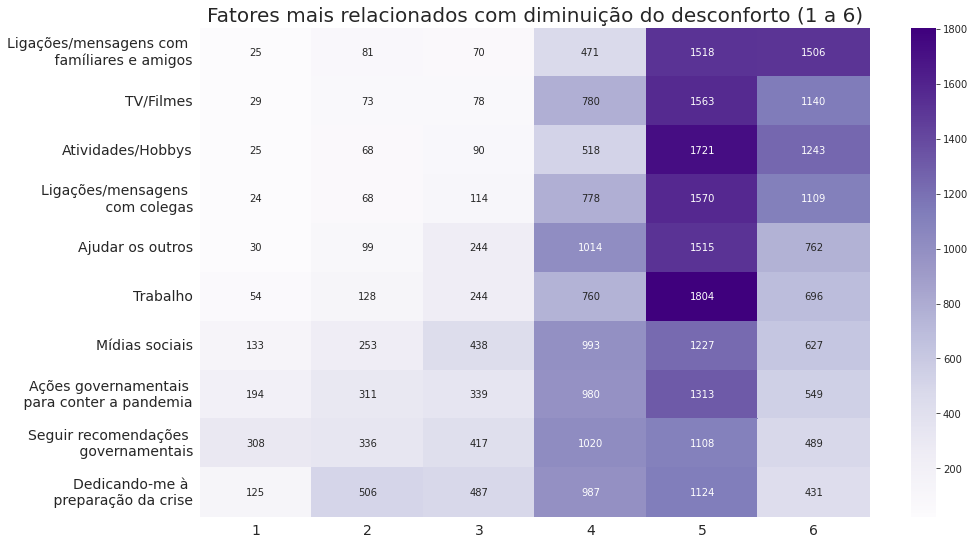

In [71]:
dfCoping = dfBR.iloc[:, 99:115].apply(pd.value_counts).reindex(index = ['Concordo plenamente','Concordo','Concordo parcialmente',
                          'Discordo parcialmente','Discordo','Discordo plenamente'])

dfCoping.index = [6, 5, 4, 3, 2, 1]
dfCoping.sort_index(inplace=True)


#selecionando as 10 variáveis relacionadas ao stress que os participantes mais concordam que aumentam o nível de angústia

rank = []
rank_Discord = []
for col in dfCoping.columns:
  rank.append(dfCoping[col][[4,5,6]].sum())

dfRank = pd.DataFrame(data = dfCoping.columns, columns=['Concordancia'], index= rank)
dfRank.sort_index(ascending=False, inplace=True)

varStress = dfRank.Concordancia[:10]
#Dataframe só com as 10 variáveis
dfCoping = dfCoping[varStress]

dfCoping.rename(columns={'Expl_Coping_3' : 'Ligações/mensagens com \n famíliares e amigos', 'Expl_Coping_9' : 'TV/Filmes',
                          'Expl_Coping_14' : 'Atividades/Hobbys', 'Expl_Coping_5' : 'Ligações/mensagens \n com colegas',
                          'Expl_Coping_10' : 'Ajudar os outros', 'Expl_Coping_13' : 'Trabalho',
                          'Expl_Coping_6' : 'Mídias sociais', 'Expl_Coping_16' : 'Ações governamentais \n para conter a pandemia',
                          'Expl_Coping_12' : 'Seguir recomendações \n governamentais', 'Expl_Coping_11' : 'Dedicando-me à \n preparação da crise'
                            }, 
                inplace=True)


# definindo a dimensão do gráfico
fig_dims = (15, 9)
fig, axx = plt.subplots(figsize=fig_dims)

ax = sns.heatmap( data=dfCoping.T, cmap="Purples", annot=True, fmt="d")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_title('Fatores mais relacionados com diminuição do desconforto (1 a 6)', fontsize=20)